# Project Milestone P4: Creative Extension

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!if [ ! -d img ]; then mkdir img; fi
!if [ ! -d img/gif ]; then mkdir img/gif; fi

! non atteso.
! non atteso.


## Data Wrangling
### Loading Datasets

* `paper_dataset`: full dataset from paper, with all variables loaded
* `ucdp_prio_data`: raw UCDP Prio dataset with conflict ID and location
* `paper_data_countries` : dataset which links `cowcode`, `cid`, `id` and `country`. 
* `paper_data_merged`: full dataset from paper, with countries specified (merged on `cid` and `year`)
* `ged_201`: dataset after 1989 with conflict id and geographical location (used for conflicts of type 2)
* `ucdp_wrangled`: UCDP data with geographical location for all conflict types
* `joined`: `ucdp_wrangled` joined with paper data, with binary `war` variable
* `wiid_gini_raw`: WIID inequality dataset, raw
* `ineq_gini`: country, year, gini data from WID
* `df_gini_clean`: final dataset with Gini score
* `df_no_gini_clean`: final dataset without Gini score


**NOTE** The dataset from Muchlinski et al seems to have a lot of missing data and the variable descriptions by Sambanis et al are not always trustworthy (e.g. the description of `oil` is incorrect). We therefore gathered data from 3 other sources: 2 for inequality data (Gini score) and 1 for conflict data (our `war` binary variable, as well as conflict locations).

In [3]:
# Global configuration for running notebook
CFG = {
    "plot_heatmaps" : True,
    "cross_val" : False,
    "verbose_print" : True, 
    "matching" : True,
    "nowarns" : True,
    "generate_gif" : False
}

In [4]:
DATA_FOLDER = "data/"

# Muchlinski et al data
ORIGINAL_PAPER_DATA = DATA_FOLDER + "SambnisImp.csv"
ORIGINAL_PAPER_COUNTRY = DATA_FOLDER + "sambanis_countries.dta"

# Conflict data (same source, 2 datasets)
GED_201 = DATA_FOLDER + "ged201-csv.zip"
UCDP_PRIO_DATA = DATA_FOLDER + "ucdp-prio-acd-201-csv.zip"

# Inequality (Gini score)
WID_DATA_FOLDER = DATA_FOLDER + "wid_all_data/"
WIID_DATASET = DATA_FOLDER + 'WIID_06MAY2020.dta'

**Dataset from Muchlinski et al. paper**

In [5]:
paper_dataset = pd.read_csv(ORIGINAL_PAPER_DATA)
paper_dataset.head()

,Unnamed: 0,atwards,X,id,cid,cowcode,year,warstds,ptime,yrint,...,decade1,decade2,decade3,decade4,independ,tip,anocracy,proxregc,sxpnew.2,sxpsq.2
0,1,0,1,1.0,1,700,1945,0,12,0,...,0,0,0,0,1,17.0,0,0.143299,0.094095,0.094095
1,2,0,2,1.0,1,700,1946,0,24,1,...,0,0,0,0,1,18.0,0,1.000000,0.094547,0.094547
2,3,0,3,1.0,1,700,1947,0,36,2,...,0,0,0,0,1,19.0,0,1.000000,0.095567,0.095567
3,4,0,4,1.0,1,700,1948,0,48,3,...,0,0,0,0,1,20.0,0,1.000000,0.101303,0.101303
4,5,0,5,1.0,1,700,1949,0,60,4,...,0,0,0,0,1,21.0,0,1.000000,0.092107,0.092107


**UDCP Dataset**

In [6]:
#ucdp_actor_data = pd.read_excel(UCDP_ACTOR_DATA, sheet_name='Dataset')
#ucdp_actor_data.head()

In [7]:
ucdp_prio_cols = ['conflict_id', 'year', 'intensity_level', 
                  'cumulative_intensity', 'type_of_conflict', 'location',
                 'territory_name']
ucdp_prio_data = pd.read_csv(UCDP_PRIO_DATA, usecols=ucdp_prio_cols)
ucdp_prio_data.head()

,conflict_id,location,territory_name,year,intensity_level,cumulative_intensity,type_of_conflict
0,11342,India,Garoland,2012,1,0,3
1,11342,India,Garoland,2014,1,0,3
2,11343,"Egypt, Israel",Suez/Sinai,1967,2,1,2
3,11343,"Egypt, Israel",Suez/Sinai,1969,1,1,2
4,11343,"Egypt, Israel",Suez/Sinai,1970,1,1,2


**GED Dataset**

In [8]:
ged_201 = pd.read_csv(GED_201, usecols=['conflict_new_id','country','year'])
ged_201.sample(5)

,year,conflict_new_id,country
213432,2016,532,Thailand
168284,2013,299,Syria
185632,2015,299,Syria
61138,1999,13624,Ethiopia
87483,2008,259,Iraq


In [9]:
#ged_201['country']
#ged_201[ged_201['conflict_new_id']==418]['country']
#ged_201.loc[221865]

## Plotting variables to visually check correlation with oil

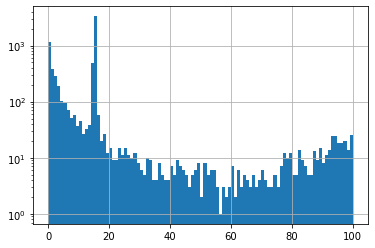

In [10]:
paper_dataset["fuelexp"].hist(bins=100).set_yscale('log')

In [11]:
# cid uniquely identifies a country, however in some cases when a country splits we have the 
# same CID for 2 different names in different years. This might be solved by joining on (year, cid)

paper_data_countries = pd.read_stata(ORIGINAL_PAPER_COUNTRY, columns=["country", "cid", "year"]).drop_duplicates()
#paper_data_countries.sample(10)
#paper_data_countries[paper_data_countries[["year", "cid"]].duplicated(keep=False)]

#paper_data_countries[paper_data_countries["country"] == "Czechoslovakia"]

In [12]:
# Note to future selves: we lost Korea 1945-1949
paper_data_merged = paper_data_countries.merge(paper_dataset, on=["cid", "year"])

In [13]:
paper_data_merged.sample(5)

,country,cid,year,Unnamed: 0,atwards,X,id,cowcode,warstds,ptime,...,decade1,decade2,decade3,decade4,independ,tip,anocracy,proxregc,sxpnew.2,sxpsq.2
1288,China,33.0,1987.0,1289,0,1835,30.0,710,0,461,...,0,0,1,0,1,18.0,0,5.290000e-23,-0.017334,-0.017334
3853,Luxembourg,92.0,1991.0,3854,0,5143,81.0,212,0,564,...,0,0,0,1,1,72.0,0,0.000000e+00,-0.400901,-0.400901
4841,Pakistan,116.0,1968.0,4842,0,6464,104.0,770,0,264,...,1,0,0,0,1,21.0,1,9.765630e-04,-1.006151,-1.006151
5129,Poland,122.0,1951.0,5130,0,6783,110.0,290,0,84,...,0,0,0,0,1,34.0,0,1.000000e+00,0.089870,0.089870
2448,Guatemala,61.0,1959.0,2449,0,3375,54.0,90,0,179,...,0,0,0,0,1,92.0,1,3.906250e-03,0.092824,0.092824


In [14]:
paper_data_merged[["country", "fuelexp", "year"]].sample(5)

,country,fuelexp,year
5181,Portugal,15.339785,1947.0
1006,Cameroon,30.673180,1981.0
5327,Rwanda,15.354226,1968.0
3194,Italy,2.282514,1991.0
2401,Greece,10.341440,1995.0


#### Heatmaps

In [15]:
# colors: https://seaborn.pydata.org/tutorial/color_palettes.html

# heatmap plot
def plot_val_by_country_year(df, val, years=None, figsize=(5, 10)):
    pivot = pd.pivot_table(data=df, columns=["year"], index="country", values=[val])
    pivot.columns = [int(x[1]) for x in pivot.columns]
    
    if years:
        pivot_slice = pivot[years]
    else:
        pivot_slice = pivot
    
    plt.figure(figsize=figsize)
    ax = sns.heatmap(pivot_slice, cmap='vlag', linewidths=0.5)
    ax.set_title(val)
    plt.savefig(f"img/year_heatmap_{val}")
    plt.show()

In [16]:
# used to concatenate pivoted dataframes
def get_pivot_with_val(df, val, years=range(1961, 2001)):
    df[val] = (df[val] - df[val].mean()) / df[val].std()
    pivot = pd.pivot_table(data=df, columns=["year"], index="country", values=[val])
    pivot.columns = [int(x[1]) for x in pivot.columns]
    if years:
        pivot_slice = pivot[years]
    else:
        pivot_slice = pivot
        
    pivot_slice.index = [x + f" ({val})" for x in pivot.index]
    
    return pivot_slice

Some years had clearly invalid data in the heatmaps, so we removed them (see the `years=range(...)` parameter)

In [17]:
# oil-dependent countries
oil_dep = paper_data_merged[(paper_data_merged["oil"] == 1)].copy()

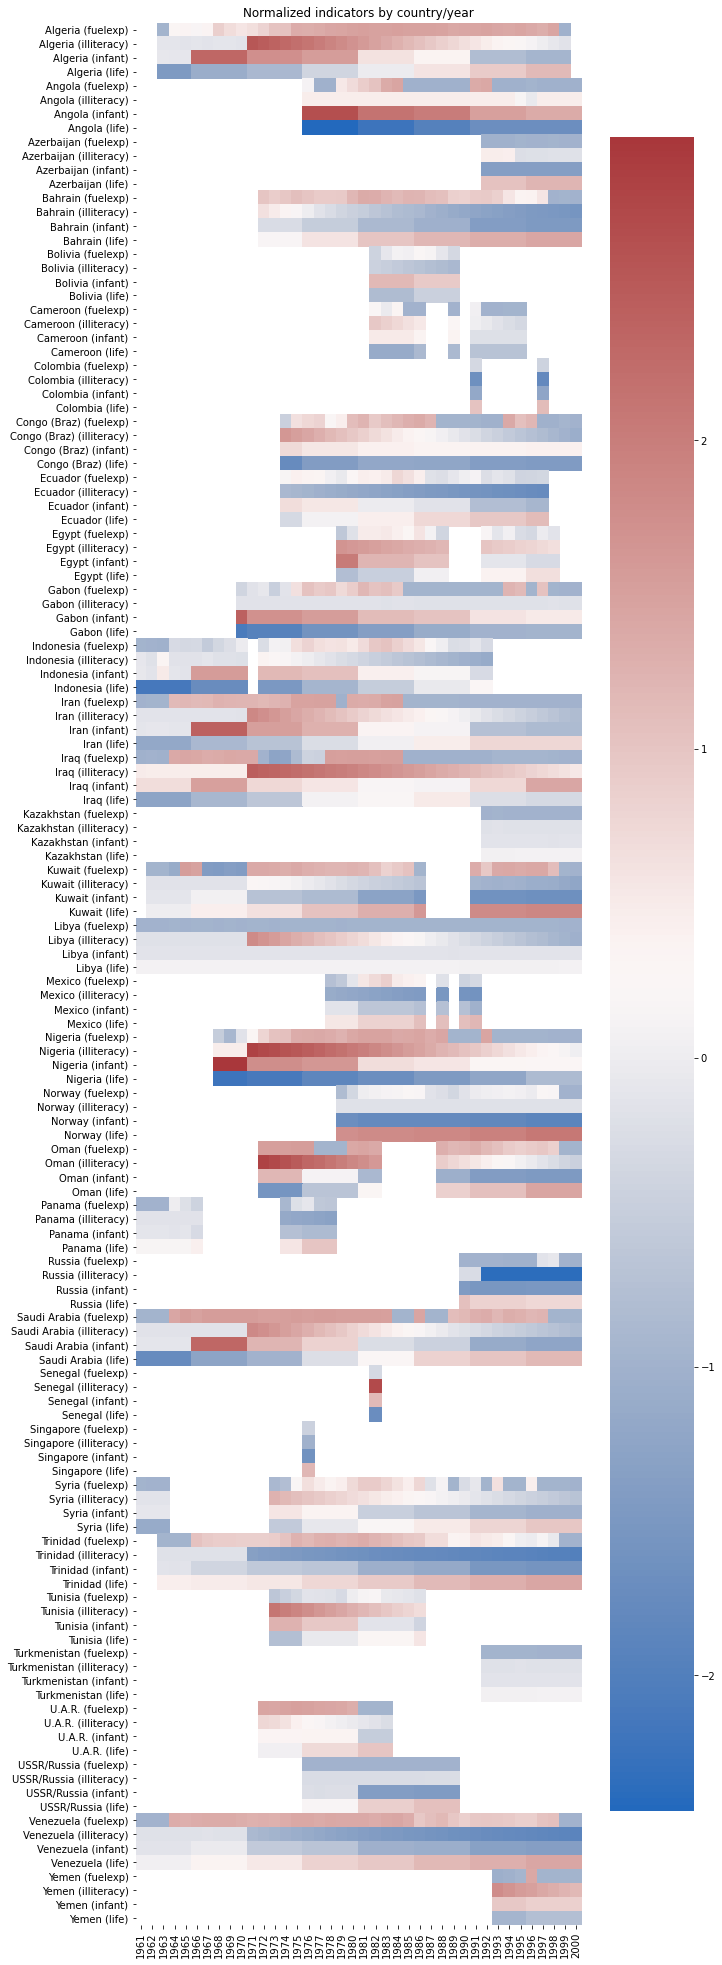

In [18]:
# plot unique heatmap
if CFG["plot_heatmaps"]:
    plt.figure(figsize=(10, 35))
    heatmap_vars = ["fuelexp", "illiteracy", "infant", "life"]
    heatmap_df = pd.concat([get_pivot_with_val(oil_dep, val) for val in heatmap_vars])
    heatmap_df.sort_index(inplace=True)
    sns.heatmap(heatmap_df, cmap="vlag").set_title("Normalized indicators by country/year")
    plt.savefig("img/unique_heatmap", bbox_inches="tight")
    plt.show()

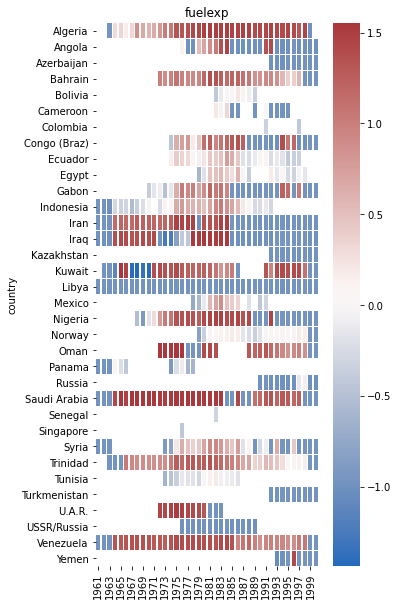

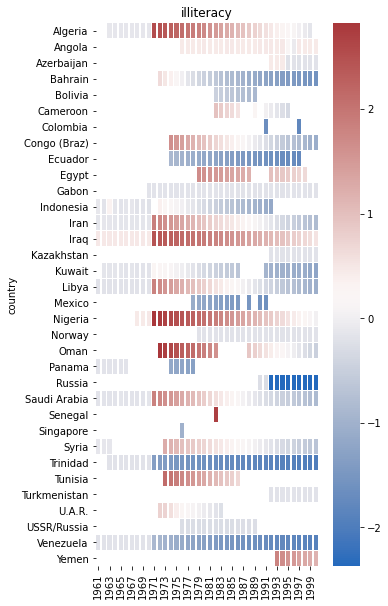

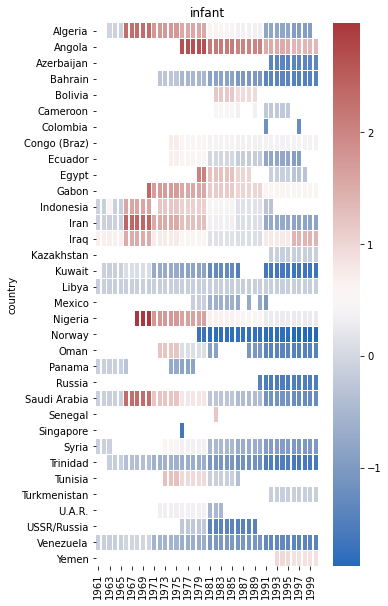

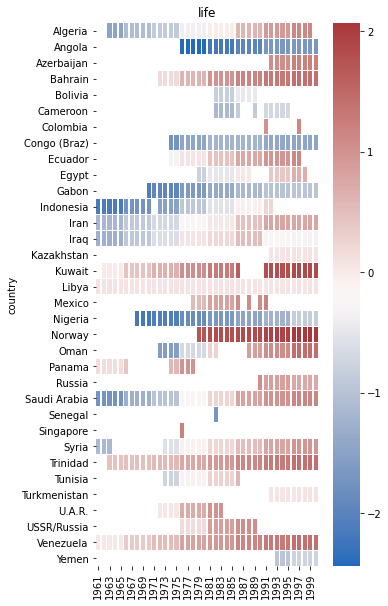

In [19]:
# plot heatmap for every indicator
if CFG["plot_heatmaps"]:
    plot_val_by_country_year(oil_dep, "fuelexp", years=range(1961, 2001))
    plot_val_by_country_year(oil_dep, "illiteracy", years=range(1961, 2001))
    plot_val_by_country_year(oil_dep, "infant", years=range(1961, 2001))
    plot_val_by_country_year(oil_dep, "life", years=range(1961, 2001))
    #plot_val_by_country_year(paper_data_merged, "oil", years=range(1961, 2001))
    #plot_val_by_country_year(paper_data_merged, "gdpgrowth")

## Data wrangling for wars in territories

1. Get a row for each territory there was a war in for each year
2. For each country that was at war, match name with existing database
2. We need some data cleaning: US never had a war in its territory!
3. For each year, add a 'war in' column in the existing database for each country + intensity level


In [20]:
# 1 extra-systemic (state vs non-state in state territory to keep control of the system) <- colonies
# 2 inter-state  
# 3 intra-state
# 4 intra-state internationalized

In [21]:
# In this case, war is fought in location : we got this
ucdp_prio_data[ucdp_prio_data.type_of_conflict == 1].sample(5)

,conflict_id,location,territory_name,year,intensity_level,cumulative_intensity,type_of_conflict
747,246,Algeria,Algeria,1960,2,1,1
739,245,Tunisia,Tunisia,1955,1,0,1
1044,279,Guinea-Bissau,Guinea-Bissau,1967,1,1,1
734,244,Morocco,Morocco,1954,1,0,1
1047,279,Guinea-Bissau,Guinea-Bissau,1970,1,1,1


In [22]:
# Not clear where the conflict was: however, only 38 conflicts: we can classify manually
len(ucdp_prio_data[(ucdp_prio_data.type_of_conflict == 2) & (ucdp_prio_data.year < 1989)].conflict_id.unique())

38

In [23]:
# In this case, war is fought in location : we got this
ucdp_prio_data[ucdp_prio_data.type_of_conflict == 3].sample(5)

,conflict_id,location,territory_name,year,intensity_level,cumulative_intensity,type_of_conflict
1699,332,Mozambique,NaN,1981,2,1,3
2352,419,Ivory Coast,NaN,2004,1,0,3
1881,347,India,Manipur,1984,1,0,3
2226,397,Bosnia-Herzegovina,Bihaca Krajina,1993,1,0,3
774,251,India,Nagaland,1958,1,1,3


In [24]:
ucdp_prio_data[(ucdp_prio_data.type_of_conflict == 3) & (ucdp_prio_data.intensity_level == 1) & (ucdp_prio_data.location == 'United Kingdom')].head(5)

,conflict_id,location,territory_name,year,intensity_level,cumulative_intensity,type_of_conflict
1499,315,United Kingdom,Northern Ireland,1971,1,0,3
1500,315,United Kingdom,Northern Ireland,1972,1,0,3
1501,315,United Kingdom,Northern Ireland,1973,1,0,3
1502,315,United Kingdom,Northern Ireland,1974,1,0,3
1503,315,United Kingdom,Northern Ireland,1975,1,0,3


In [25]:
ucdp_prio_data[(ucdp_prio_data.type_of_conflict != 2) & (ucdp_prio_data.location.str.contains('United States'))].head(5)

,conflict_id,location,territory_name,year,intensity_level,cumulative_intensity,type_of_conflict
705,238,United States of America,Puerto Rico,1950,1,0,1
2332,418,United States of America,NaN,2001,2,1,4
2333,418,United States of America,NaN,2002,1,1,4
2334,418,United States of America,NaN,2003,1,1,4
2335,418,United States of America,NaN,2004,1,1,4


In [26]:
# Idea: always match countries with others that have the same intensity of war. Keep all intensities. 

## Selecting useful columns from datasets and merging on conflict id
To know the geographic location of war we merge the UCDP/PRIO dataset with the disgregated dataset (ged-201) in order to have a new dataset with important information for data analysis. So we did a filtering on the columns of the two datasets and we merged using the feature conflic_id_new, for the disgregated dataset, and the feature conflict_id for the UCDP/PRIO dataset. These two features are fully compatible and identify a specific conflict.
Using the UCDP dataset we select conflicts with types of conflict equal to 1, 3 or 4 (extrasystemic, intrastate, internationalzed intrastate) because in these cases the location corresponds to the geografic location which is not true in general. For conflicts of type 2 (interstates) we use the merging as described above for conflicts starting from 1989, for the others we classify the geographic location manually using the geografic area.

In [27]:
# GED_201 contains data from 1989 onwards
ged_201['year'].min()

1989

#### Selecting conflicts of types (1,3,4)

Select conflicts of type 1, 3 and 4 between 1961 and 2000 where "location" means geographic location.

In [28]:
# Filter years between 1961 and 2000
ucdp_prio_data_1961_2000 = ucdp_prio_data[(ucdp_prio_data['year']>1960) & (ucdp_prio_data['year']<=2000)]
# filter conflicts of type 1, 3, 4 between 1961 and 2000
ucdp_prio_data_134 = ucdp_prio_data_1961_2000[ucdp_prio_data_1961_2000['type_of_conflict'] != 2]

#### Selecting conflicts of type 2 after the 1989

In [29]:
# filter conflicts of type 2 between 1961 and 2000
ucdp_prio_data_2 = ucdp_prio_data_1961_2000[ucdp_prio_data_1961_2000['type_of_conflict'] == 2]

In [30]:
# view conflicts of type 2 between 1961 and 2000
ucdp_prio_data_2[ucdp_prio_data_2['year']>1988].head()

,conflict_id,location,territory_name,year,intensity_level,cumulative_intensity,type_of_conflict
291,218,"India, Pakistan",Kashmir,1989,1,1,2
292,218,"India, Pakistan",Kashmir,1990,1,1,2
293,218,"India, Pakistan",Kashmir,1991,1,1,2
294,218,"India, Pakistan",Kashmir,1992,1,1,2
295,218,"India, Pakistan",Kashmir,1996,1,1,2


In [31]:
# merging with ged_201 to have the geographical location for conflicts after 1989
ucdp_2_after1989 = pd.merge(ged_201, ucdp_prio_data_2, 
                            left_on= ['conflict_new_id','year'], 
                            right_on =['conflict_id','year']).drop_duplicates()

In [32]:
# drop "location" and "conflict_new_id", then rename country to "location". 
# Now location is geographical location

ucdp_2_drop_cols = ["conflict_new_id", "location"]
if all([col in ucdp_2_after1989 for col in ucdp_2_drop_cols]):
    ucdp_2_after1989.drop(ucdp_2_drop_cols, axis=1, inplace=True)
    print(f"Dropped: {ucdp_2_drop_cols}")

ucdp_2_after1989.rename(columns = {"country" : "location"}, inplace=True)
ucdp_2_after1989.sample(5)

Dropped: ['conflict_new_id', 'location']


,year,location,conflict_id,territory_name,intensity_level,cumulative_intensity,type_of_conflict
242,1990,Kuwait,371,Kuwait,2,1,2
238,1991,Saudi Arabia,371,Kuwait,2,1,2
51,1999,Ethiopia,409,Common border,2,1,2
80,1992,India,218,Kashmir,1,1,2
3,1995,Ecuador,403,Cordillera del Condor,1,0,2


#### Selecting manually the location of interstate conflicts (2) before 1989

In [33]:
# before 1970
ucdp_before_1970 = ucdp_prio_data_2[ucdp_prio_data_2['year'] < 1970].copy()
ucdp_before_1970["location"] = ucdp_before_1970["location"].str.split(', ') # split on comma
ucdp_before_1970_exp = ucdp_before_1970.explode("location") # explode split rows

ucdp_before_1970_exp.index = range(2500, 2500+len(ucdp_before_1970_exp)) # reassign index 
ucdp_before_1970_exp.sample(5) 

,conflict_id,location,territory_name,year,intensity_level,cumulative_intensity,type_of_conflict
2509,268,Somalia,Ogaden,1964,1,0,2
2521,281,Malaysia,North Borneo,1963,1,0,2
2537,293,Vietnam (North Vietnam),South Vietnam,1969,2,1,2
2504,218,India,Kashmir,1964,1,1,2
2543,304,Myanmar (Burma),Common Border,1969,1,0,2


In [34]:
# Drop countries where the war did not take place
udcp_before_1970_manual = ucdp_before_1970_exp.drop([
    2501, # Israel Suez
    2503, # Israel Suez
    2509, # Somalia Ogaden
    2510, # France 1961 (vs Tunisia)
    2517, # France 1961 (vs Tunisia)
    2529, # North Vietnam 1965
    2531, # North Vietnam 1965
    2533, # North Vietnam 1965
    2535, # North Vietnam 1965
    2537, # North Vietnam 1965
    2540, # Israel Golan
])

In [35]:
# Same as above for conflicts between 1980 and 1988
df_1988 = ucdp_prio_data[(ucdp_prio_data.type_of_conflict == 2) & (ucdp_prio_data.year >= 1980) & (ucdp_prio_data.year<=1988)].copy()
df_1988["location"] = df_1988["location"].str.split(', ')
df_1988_exploded = df_1988.explode("location")
df_1988_exploded.index = range(2700, 2700+len(df_1988_exploded))
udcp_before_1988_manual = df_1988_exploded.drop([2739, 2743, 2707])

In [36]:
# Same as above for conflicts between 1970 and 1980
ucdp_before_1980 = ucdp_prio_data_2[(ucdp_prio_data_2['year']>1970) & (ucdp_prio_data_2['year']<1980)].copy()
ucdp_before_1980["location"] = ucdp_before_1980["location"].str.split(', ')
ucdp_before_1980_exp = ucdp_before_1980.explode("location")
ucdp_before_1980_exp.index = list(range(2600, 2600+len(ucdp_before_1980_exp)))
ucdp_before_1980_manual = ucdp_before_1980_exp.drop([2601 # Israel Suez
                           ,2605 # Somalia Ogaden
                           ,2607,# Somalia Ogaden
                           2609, # Somalia Ogaden
                           2611, #North Vietnam
                           2613, #North Vietnam
                           2615, #North Vietnam
                           2617, #North Vietnam
                           2622, #Israel Golan
                           2629, #Turkey north cyprus
                           2645, #Uganda Kagera Salient
                           2647, #Russia
                          ])

In [37]:
# concatenate all conflicts of level 2
ucdp_manual = pd.concat([udcp_before_1970_manual, ucdp_before_1980_manual, udcp_before_1988_manual])
ucdp_conflict_level2 = pd.concat([ucdp_manual, ucdp_2_after1989])
ucdp_conflict_level2.sample(5)

,conflict_id,location,territory_name,year,intensity_level,cumulative_intensity,type_of_conflict
2632,328,Cambodia (Kampuchea),Common Border,1975,1,0,2
2513,274,India,"Aksai Chin, Arunachal Pradesh",1962,2,1,2
2521,281,Malaysia,North Borneo,1963,1,0,2
2538,301,Israel,West Bank,1967,2,1,2
2545,305,Russia (Soviet Union),Ussuri river,1969,1,0,2


In [38]:
# concatenate all conflicts
filtercols = ["location", "year", "conflict_id", "intensity_level", 
              "cumulative_intensity", "territory_name"]#, "region"]
ucdp_wrangled = pd.concat([ucdp_prio_data_134, ucdp_conflict_level2])[filtercols].sort_values(by="year")

ucdp_wrangled.sample(5)

,location,year,conflict_id,intensity_level,cumulative_intensity,territory_name
2633,Vietnam (North Vietnam),1975,328,1,0,Common Border
1415,Sudan,1983,309,2,1,NaN
1911,India,1991,351,2,1,Punjab/Khalistan
2289,Ethiopia,1985,413,1,1,Oromiya
2063,Mali,1991,372,1,0,Azawad


In [39]:
# Standardize names
name_map = {
    "Bosnia" : "Bosnia-Herzegovina",
    "Cambodia (Kampuchea)" : "Cambodia",
    "Congo" : "Congo (Braz)",
    "Zaire/Congo" : "DR Congo (Zaire)",
    "Guinea Bissau" : "Guinea-Bissau",
    "Papua NG" : "Papua New Guinea",
    "Madagascar (Malagasy)" : "Madagascar",
    "Myanmar/Burma" : "Myanmar (Burma)",
    "USSR/Russia" : "Russia (Soviet Union)",
    "Serbia (Yugoslavia)" : "Yugoslavia",
    "Trinidad" : "Trinidad and Tobago",
    "United Kingdom" : "U.K.",
    "Yemen (North Yemen)" : "Yemen",
    "South Yemen" : "Yemen",
    "Zimbabwe (Rhodesia)" : "Zimbabwe",
    "Vietnam (North Vietnam)" : "Vietnam"
}


# substitute names
# paper_features = ["country", "life", "fuelexp", "year", "illiteracy", "infant"]
# paper_wellbeing = paper_data_merged[paper_features].copy()
paper_wellbeing = paper_data_merged # rename
paper_wellbeing.country = [name_map.get(x, x) for x in paper_wellbeing.country]
ucdp_wrangled.location = [name_map.get(x, x) for x in ucdp_wrangled.location]

# year as int
paper_wellbeing.year = paper_wellbeing.year.astype(int)

# rename Vietnam before unification to South Vietnam
# Data before unification is very likely only from South Vietnam
vietnam_index = paper_wellbeing[(paper_wellbeing["country"] == "Vietnam") & (paper_wellbeing["year"] < 1976)].index
paper_wellbeing.loc[vietnam_index, "country"] = "South Vietnam"

In [40]:
# drop North Vietnam before 1976
dropped_vietnam = False
if not dropped_vietnam:
    ucdp_wrangled.drop([2639, 2633], inplace=True)
    dropped_vietnam = True

In [41]:
# change Russia to USSR in 1990 and 1991 (this is likely a mistake)
russia_index = paper_wellbeing[(paper_wellbeing["country"] == "Russia") & (paper_wellbeing["year"] <= 1991)].index
paper_wellbeing.loc[russia_index, "country"] = "Russia (Soviet Union)"

# change USSR after 1992 to Russia
ussr_index = ucdp_wrangled[(ucdp_wrangled["location"] == "Russia (Soviet Union)") & (ucdp_wrangled["year"] > 1991)].index
ucdp_wrangled.loc[ussr_index, "location"] = "Russia"

In [42]:
ucdp_paper_outerjoin = paper_wellbeing.merge(ucdp_wrangled, how='outer', 
                                             left_on=["country", "year"], 
                                             right_on=["location", "year"])
ucdp_paper_outerjoin.sample(5)

,country,cid,year,Unnamed: 0,atwards,X,id,cowcode,warstds,ptime,...,tip,anocracy,proxregc,sxpnew.2,sxpsq.2,location,conflict_id,intensity_level,cumulative_intensity,territory_name
4513,Morocco,104.0,1985,4298.0,1.0,5809.0,92.0,600.0,0.0,237.0,...,17.595825,0.0,3.640000e-12,-0.471590,-0.471590,Morocco,331.0,1.0,1.0,Sahrawi Arab Democratic Republic (Western Sahara)
1464,Costa Rica,37.0,1966,1447.0,0.0,2038.0,34.0,94.0,0.0,262.0,...,47.000000,0.0,0.000000e+00,0.092919,0.092919,NaN,NaN,NaN,NaN,NaN
4283,Malta,98.0,1997,4068.0,0.0,5485.0,86.0,338.0,0.0,408.0,...,33.000000,0.0,1.394635e-01,0.092644,0.092644,NaN,NaN,NaN,NaN,NaN
2522,Guatemala,61.0,1952,2442.0,0.0,3368.0,54.0,90.0,0.0,96.0,...,85.000000,1.0,2.500000e-01,0.096944,0.096944,NaN,NaN,NaN,NaN,NaN
3881,Lesotho,88.0,1979,3670.0,0.0,4907.0,79.0,570.0,0.0,168.0,...,13.000000,0.0,1.530000e-05,0.088274,0.088274,NaN,NaN,NaN,NaN,NaN


In [43]:
# check which names in ucdp_wrangled and paper_wellbeing don't overlap
x = ucdp_paper_outerjoin.country.unique().astype(str)
y = ucdp_paper_outerjoin.location.unique().astype(str)
print("in paper_wellbeing, not in ucdp_wrangled:\n", np.setdiff1d(x, y))
print("in ucdp_wrangled, not in paper_wellbeing:\n", np.setdiff1d(y, x))

in paper_wellbeing, not in ucdp_wrangled:
 ['Albania' 'Armenia' 'Australia' 'Austria' 'Bahamas' 'Bahrain' 'Barbados'
 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Botswana' 'Brazil'
 'Bulgaria' 'C.A.R.' 'Canada' 'Cape Verde' 'Costa Rica' 'Czech Republic'
 'Czechoslovakia' 'Denmark' 'Estonia' 'Fiji' 'Finland' 'Germany' 'Greece'
 'Guyana' 'Hungary' 'Iceland' 'Ireland' 'Italy' 'Ivory Coast' 'Jamaica'
 'Japan' 'Kazakhstan' 'Korea, South' 'Kyrgyzstan' 'Latvia' 'Lithuania'
 'Luxembourg' 'Macedonia' 'Malawi' 'Malta' 'Mauritius' 'Mongolia'
 'Namibia' 'Netherlands' 'New Zealand' 'Norway' 'Poland' 'Portugal'
 'Qatar' 'Seychelles' 'Singapore' 'Slovakia' 'Slovenia' 'Solomon Islands'
 'Swaziland' 'Sweden' 'Switzerland' 'Taiwan' 'Turkmenistan' 'U.A.R.'
 'U.S.A.' 'Ukraine' 'Vanuatu' 'Western Samoa' 'Yemen AR' 'Yemen PR'
 'Zambia']
in ucdp_wrangled, not in paper_wellbeing:
 ['Brunei']


In [44]:
# copy location column to country when country is null, then drop location
joined = ucdp_paper_outerjoin.copy()
joined.loc[joined.country.isnull(), "country"] = joined.loc[joined.country.isnull(), "location"]

# drop location
if "location" in joined:
    joined.drop("location", inplace=True, axis=1)
    print("Done")

Done


In [45]:
# add new binary column for when the country is at war
# NOTE: "war" in this case is generic war of any type

joined["war"] = (~joined.conflict_id.isnull()).astype(int)
joined.sample(5)

,country,cid,year,Unnamed: 0,atwards,X,id,cowcode,warstds,ptime,...,tip,anocracy,proxregc,sxpnew.2,sxpsq.2,conflict_id,intensity_level,cumulative_intensity,territory_name,war
7509,Zimbabwe,172.0,1967,7107.0,0.0,9599.0,161.0,552.0,0.0,24.0,...,1.0,0.0,1.457817e-01,0.098730,0.098730,318.0,1.0,0.0,NaN,1
177,Angola,4.0,1997,173.0,1.0,221.0,3.0,540.0,0.0,24.0,...,2.0,1.0,1.000000e+00,-0.457900,-0.457900,387.0,1.0,0.0,Cabinda,1
2470,Greece,59.0,1983,2390.0,0.0,3287.0,52.0,350.0,0.0,414.0,...,33.0,0.0,6.100000e-05,-1.013684,-1.013684,NaN,NaN,NaN,NaN,0
2171,Finland,52.0,1986,2094.0,0.0,2898.0,45.0,375.0,0.0,504.0,...,69.0,0.0,2.070000e-25,-0.893201,-0.893201,NaN,NaN,NaN,NaN,0
1106,Cape Verde,29.0,1984,1092.0,0.0,1608.0,26.0,402.0,0.0,120.0,...,9.0,0.0,1.399795e-01,0.088295,0.088295,NaN,NaN,NaN,NaN,0


## Income inequality

In [46]:
import glob
ineq_csv_files = glob.glob(WID_DATA_FOLDER + '/*_data*.csv')

wid_gini_usecols = ["country", "year", "variable", "value"]
ineq_df_list = [pd.read_csv(csv, sep=';', keep_default_na=False, usecols=wid_gini_usecols) 
                for csv in ineq_csv_files]

In [47]:
# get country indices
ineq_countries = pd.read_csv(WID_DATA_FOLDER + '/WID_countries.csv', sep=';', usecols=["alpha2", "shortname"])
ineq_countries_map = {code : name for code, name in zip(ineq_countries["alpha2"], ineq_countries["shortname"])}

# this is a pretty big map... used to rename countries
if CFG["verbose_print"]:
    print(ineq_countries_map)

{'AM': 'Armenia', 'AN': 'Netherlands Antilles', 'AO': 'Angola', 'AR': 'Argentina', 'AS': 'American Samoa', 'AT': 'Austria', 'AU': 'Australia', 'AW': 'Aruba', 'AZ': 'Azerbaijan', 'BA': 'Bosnia and Herzegovina', 'BB': 'Barbados', 'BD': 'Bangladesh', 'BE': 'Belgium', 'BF': 'Burkina Faso', 'BG': 'Bulgaria', 'BH': 'Bahrain', 'BI': 'Burundi', 'BJ': 'Benin', 'BM': 'Bermuda', 'BN': 'Brunei Darussalam', 'BO': 'Bolivia', 'BR': 'Brazil', 'BS': 'Bahamas', 'BT': 'Bhutan', 'BW': 'Botswana', 'BY': 'Belarus', 'BZ': 'Belize', 'CA': 'Canada', 'CD': 'DR Congo', 'CF': 'Central African Republic', 'CG': 'Congo', 'CH': 'Switzerland', 'CI': "Cote d'Ivoire", 'CK': 'Cook Islands', 'CL': 'Chile', 'CM': 'Cameroon', 'CN': 'China', 'CN-RU': 'Rural China', 'CN-UR': 'Urban China', 'CO': 'Colombia', 'CR': 'Costa Rica', 'CS': 'Czechoslovakia', 'CU': 'Cuba', 'CV': 'Cabo Verde', 'CW': 'Curacao', 'CY': 'Cyprus', 'CZ': 'Czech Republic', 'DD': 'German Democratic Republic', 'DE': 'Germany', 'DJ': 'Djibouti', 'DK': 'Denmark',

In [48]:
ineq_full_raw = pd.concat(ineq_df_list) # join all files

# filter interesting rows
ineq_gini = ineq_full_raw[(ineq_full_raw["variable"] == "gptinc992j") & 
                          (ineq_full_raw["year"] > 1960) & 
                          (ineq_full_raw["year"] <= 2000)].copy()

del ineq_full_raw # free up some memory
ineq_gini.sample(5)

,country,variable,year,value
8765,CG,gptinc992j,1998,0.641285
162065,FR,gptinc992j,1967,0.487134
29151,CV,gptinc992j,1994,0.690642
10043,XR-MER,gptinc992j,1988,0.281233
16194,NO,gptinc992j,1996,0.343410


In [49]:
# rename country code with country names
ineq_gini.country = [ineq_countries_map.get(c, c) for c in ineq_gini.country]

# rename gini column
ineq_gini.rename(columns = {"value" : "gini"}, inplace=True)

# drop "variable column"
if "variable" in ineq_gini:
    ineq_gini.drop("variable", axis=1, inplace=True)
    print("Done")

ineq_gini.sample(5)

Done


,country,year,gini
56789,Bosnia and Herzegovina,1991,0.354556
8759,Congo,1992,0.641285
22652,"Asia (excluding Middle East), Market Exchange ...",1992,0.626799
25250,Mauritania,2000,0.558016
19084,Czech Republic,1987,0.205596


In [50]:
#Country names mapping for inequality database
ineq_rename = {
    "Bosnia and Herzegovina" : "Bosnia-Herzegovina",
    "Cabo Verde" : "Cape Verde",
    "Central African Republic" : "C.A.R.",
    "Congo" : "Congo (Braz)",
    "DR Congo" : "DR Congo (Zaire)",
    "German Democratic Republic" : "Germany",
    "Russian Federation" : "Russia",
    "Syrian Arab Republic" : "Syria",
    "USA" : "U.S.A.",
    "United Kingdom" : "U.K.",
    "United Arab Emirated" : "U.A.R.",
    "Cote d'Ivoire" : "Ivory Coast"
}
#Mapping names
ineq_gini.country = [ineq_rename.get(c, c) for c in ineq_gini.country]

In [51]:
#Printing set differences between countries in current database and inequality database
x = ineq_gini.country.unique().astype(str)
y = joined.country.unique().astype(str)
print("in ineq_gini, not in joined:\n", np.setdiff1d(x, y))
print("in joined, not in ineq_gini:\n", np.setdiff1d(y, x))

in ineq_gini, not in joined:
 ['Africa' 'Asia (excl. Middle East)'
 'Asia (excluding Middle East), Market Exchange Rate' 'Eastern Africa'
 'Eastern Europe' 'Equatorial Guinea' 'Europe' 'European Union'
 'Latin America' 'Latin America, Market Exchange Rate' 'Middle Africa'
 'Middle East' 'Middle East and Northern Africa'
 'Middle East and Northern Africa, Market Exchange Rate' 'Montenegro'
 'Northern Africa' 'Northern America' 'Oceania' 'Palestine' 'Rural China'
 'Russia and Ukraine' 'Russia and Ukraine, Market Exchange Rate'
 'Sao Tome and Principe' 'Serbia' 'Southern Africa' 'Sub-Saharan Africa'
 'Sub-Saharan Africa, Market Exchange Rate' 'United Arab Emirates'
 'Urban China' 'Western Africa' 'World' 'World (Market Exchange Rate)'
 'Zanzibar' 'nan']
in joined, not in ineq_gini:
 ['Afghanistan' 'Argentina' 'Armenia' 'Australia' 'Azerbaijan' 'Bahamas'
 'Bangladesh' 'Barbados' 'Belarus' 'Belize' 'Bhutan' 'Bolivia' 'Brazil'
 'Brunei' 'Cambodia' 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Cu

Lots of countries are missing a Gini coefficient! We should look for another dataset...

## 2nd Gini dataset

This second dataset is joined with the previous one to have more complete data on Gini coefficients

In [52]:
#Filtering important columns from gini dataset 2
wiid_filtercols = ["country", "year", "gini_reported"]
wiid_gini_raw = pd.read_stata(WIID_DATASET, columns=wiid_filtercols)

In [53]:
#Selecting data from 1960 to 2000
gini_years = wiid_gini_raw[(wiid_gini_raw.year > 1960) & (wiid_gini_raw.year <= 2000)].copy()
gini_years.sample(5)

,country,year,gini_reported
4227,Germany,1985.0,30.10
4189,Germany,1978.0,30.80
9640,Sri Lanka,1991.0,32.45
721,Barbados,1979.0,35.10
10692,United Kingdom,1986.0,35.90


In [54]:
# rename countries
gini_2_mapping = {
    'Bahamas, The' : 'Bahamas',
    'Bosnia and Herzegovina' : 'Bosnia-Herzegovina',
    'Central African Republic' : 'C.A.R.',
    "Cote d'Ivoire" : 'Ivory Coast',
    'Czechia' : 'Czech Republic',
    'Eswatini' : 'Swaziland',
    'Gambia, The' : 'Gambia',
    'Korea, Republic of' : 'Korea, South',
    'North Macedonia' : 'Macedonia',
    'Serbia and Montenegro' : 'Serbia',
    'Soviet Union' : 'Russia (Soviet Union)',
    'United Kingdom' : 'U.K.',
    'United States' : 'U.S.A.'
}

gini_years.country = gini_years.country.apply(lambda c : gini_2_mapping[c] if c in gini_2_mapping else c)

In [55]:
# Take mean of all reported gini values
gini_by_country_year = gini_years.groupby(['country', 'year']).mean()

# standardize gini units
gini_by_country_year.gini_reported = gini_by_country_year.gini_reported.apply(lambda x : x/100)

gini_by_country_year.reset_index(inplace=True)
gini_by_country_year.rename(columns = {"gini_reported" : "gini"}, inplace=True)

gini_by_country_year.sample(5)

,country,year,gini
1424,Singapore,1993.0,0.40375
533,Ecuador,1997.0,0.46900
1361,Russia,1994.0,0.44100
415,Costa Rica,1983.0,0.45350
817,Iran,1998.0,0.44100


In [56]:
# join 1st and 2nd gini datasets (take mean for different gini sources)
gini_final = pd.concat([ineq_gini, gini_by_country_year]).groupby(['country', 'year']).mean()
gini_final.reset_index(inplace=True)
gini_final.sample(5)

,country,year,gini
2169,Palestine,1996.0,0.570329
2376,Russia and Ukraine,1993.0,0.462490
1786,Mali,2000.0,0.585115
2736,Sweden,1991.0,0.299329
1509,Kenya,1982.0,0.573000


In [57]:
# join with conflict data
final_df = joined.merge(gini_final, how='left', on=["country", "year"])
final_df.sample(5)

,country,cid,year,Unnamed: 0,atwards,X,id,cowcode,warstds,ptime,...,anocracy,proxregc,sxpnew.2,sxpsq.2,conflict_id,intensity_level,cumulative_intensity,territory_name,war,gini
6020,Somalia,135.0,1992,5638.0,1.0,7552.0,123.0,520.0,0.0,339.0,...,1.0,1.000000e+00,0.050263,0.050263,337.0,2.0,1.0,NaN,1,0.636629
5747,Saudi Arabia,127.0,1949,5365.0,0.0,7061.0,117.0,670.0,0.0,60.0,...,0.0,1.000000e+00,0.090450,0.090450,NaN,NaN,NaN,NaN,0,NaN
5615,Portugal,123.0,1998,5233.0,0.0,6886.0,111.0,235.0,0.0,648.0,...,0.0,2.270000e-13,0.090866,0.090866,NaN,NaN,NaN,NaN,0,0.430040
7409,Yugoslavia,169.0,1982,7010.0,0.0,9446.0,158.0,345.0,0.0,456.0,...,1.0,1.390000e-17,0.066404,0.066404,NaN,NaN,NaN,NaN,0,0.210000
2756,Honduras,66.0,1969,2676.0,0.0,3665.0,59.0,91.0,0.0,300.0,...,1.0,5.420000e-20,1.038565,1.038565,306.0,2.0,1.0,Common Border,1,NaN


In [58]:
# deal with nans (substitute with zero)
final_df.intensity_level = final_df.intensity_level.apply(lambda x : 0 if np.isnan(x) else x)
final_df.cumulative_intensity = final_df.cumulative_intensity.apply(lambda x : 0 if np.isnan(x) else 1 if x == 1 else 2)

In [59]:
wellbeing_features = ["life", "oil", "fuelexp", "war", "illiteracy", "infant", "intensity_level", "cumulative_intensity", "gini"]
used_columns = sorted(list(set(["ager", "agexp", "anoc", "army85", "autch98", "auto4",
    "autonomy", "avgnabo", "centpol3", "coldwar", "decade1", "decade2",
    "decade3", "decade4", "dem", "dem4", "demch98", "dlang", "drel", "durable",
    "ef", "ef2", "ehet", "elfo", "elfo2", "etdo4590", "expgdp", "exrec",
    "fedpol3", "fuelexp", "gdpgrowth", "geo1", "geo2", "geo34", "geo57",
    "geo69", "geo8", "illiteracy", "incumb", "infant", "inst", "inst3", "life",
    "lmtnest", "ln_gdpen", "lpopns", "major", "manuexp", "milper", "mirps0",
    "mirps1", "mirps2", "mirps3", "nat_war", "ncontig", "nmgdp", "nmdp4_alt",
    "numlang", "nwstate", "oil", "p4mchg", "parcomp", "parreg", "part",
    "partfree", "plural", "plurrel", "pol4", "pol4m", "pol4sq", "polch98",
    "polcomp", "popdense", "presi", "pri", "proxregc", "ptime", "reg",
    "regd4_alt", "relfrac", "seceduc", "second", "semipol3", "sip2", "sxpnew",
    "sxpsq", "tnatwar", "trade", "warhist", "xconst", "oil33"] + ["year", "country"]).union(set(wellbeing_features))))

Because many countries are missing historical Gini score values, we will do our analyses with and without the Gini score as a feature

In [60]:
# create a binary feature for countries that export more than 33% of GDP as fuel
final_df["oil33"] = (final_df["fuelexp"] > 33).astype(int)
df_gini = final_df[(final_df.year > 1960) & (final_df.year <= 2000)][used_columns]

df_gini_clean = df_gini.dropna() # dataset with 'gini' column, without nans

In [61]:
df_no_gini = df_gini.drop('gini', axis=1)
df_no_gini_clean = df_no_gini.dropna() # dataset without 'gini' column, without nans

# 1. Is oil correlated with a country's wellbeing?

Is there a correlation between abundance/high exports of oil in a country and its population's wellbeing?

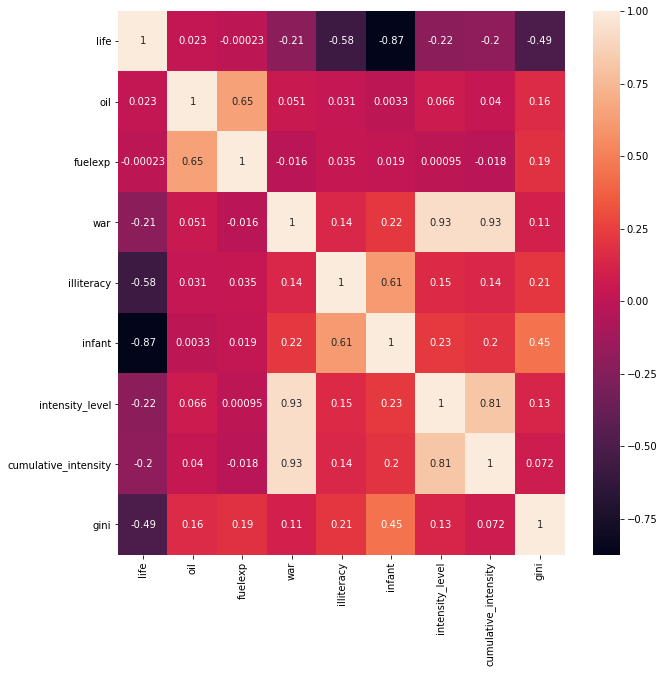

In [62]:
#Building correlation matrix to verify correlation between interesting variables and oil
plt.figure(figsize=(10,10))
corrMatrix = final_df[wellbeing_features].corr()
sns.heatmap(corrMatrix, annot=True)
plt.savefig("img/heatmap", bbox_inches="tight")
plt.show()

With the current data, we can see no correlation between oil export and any of the variable that is an index of well-being. As a consequence, it does not make sense to look for causation.
The only possibly relevant feature is the gini index. Further integrations of the Gini score into the dataset would be necessary in order to evaluate this relation properly.

## 2. What are the variables that have the most influence in the prediction of a war?

In [63]:
#Variables non relevant to or consequence of target variable (war)
drop_cols = ['war', 'year', 'country', 'intensity_level', 'cumulative_intensity', 'milper', 'army85', 'sxpsq', 'elfo2', 'ef2']

#Isolating x and y for Random Forest classification for both datasets
x_df_no_gini = df_no_gini_clean.drop(drop_cols, axis=1)
y_df_no_gini = df_no_gini_clean.war
x_df_gini = df_gini_clean.drop(drop_cols, axis=1)
y_df_gini = df_gini_clean.war

Let's print the frequency of 1s to check if the dataset is unbalanced and which accuracy we should target

In [64]:
df_no_gini_clean.war.values.sum()/len(df_no_gini_clean)

0.22898689677213166

In [65]:
df_gini_clean.war.values.sum()/len(df_gini_clean)

0.218609865470852

## Cross Validation

Here we try to find the most important features to predict `war` (occurrence of a war on a country's territory). We first do a train-test split with cross-validation to find the best hyperparamaters, then we train on the entire dataset and rank features by importance.

In [66]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score
from sklearn.ensemble import  RandomForestClassifier

In [67]:
#Test-train split for no gini dataset
x_train, x_test, y_train, y_test = train_test_split(x_df_no_gini, y_df_no_gini, test_size=0.2)

In [68]:
def find_best_rf(x_train, y_train):
    # best value is 100, this "if" condition skips cross validation to speed up notebook execution
    n_estimators_list = range(50, 450, 50) if CFG["cross_val"] else [100]
    
    score_means = []
    
    #Cross validation to evaluate the model
    for e in n_estimators_list:
        rf = RandomForestClassifier(n_estimators=e)
        scores = cross_val_score(rf, x_train, y_train, cv=10, scoring='f1')
        mean_score = np.mean(scores) #mean scores across all estimators
        score_means.append((rf, mean_score))
        print (f"n_estimators: {e}, mean score: {mean_score}")

    rf_best, _ = max(score_means, key = lambda x : x[1])
    return rf_best

In [69]:
#Find best model
rf_best = find_best_rf(x_train, y_train)

#For the best performing model we compute the accuracy
rf_best.fit(x_train, y_train)
rf_best.score(x_test, y_test)

n_estimators: 100, mean score: 0.8835745209654243


0.9464856230031949

In [70]:
#F1-score 
f1_score(rf_best.predict(x_test), y_test)

0.8770642201834862

In [71]:
#first 25 most important features for mean decrease in Gini Score
list(reversed(sorted(list(zip(rf_best.feature_importances_, x_train.columns)))))[:25]

[(0.06092585318551519, 'sxpnew'),
 (0.05214427986212709, 'lpopns'),
 (0.03677651138527225, 'nmgdp'),
 (0.03588841125185407, 'numlang'),
 (0.03573778693779421, 'expgdp'),
 (0.035013651940774076, 'illiteracy'),
 (0.03424376869838049, 'ehet'),
 (0.0328934222657695, 'trade'),
 (0.02894662258506854, 'agexp'),
 (0.025942448301747037, 'ln_gdpen'),
 (0.024995886067783735, 'ptime'),
 (0.02341849709524428, 'lmtnest'),
 (0.022288974119316515, 'popdense'),
 (0.021633005773287407, 'dlang'),
 (0.021502468464508998, 'drel'),
 (0.020313555787560566, 'fuelexp'),
 (0.01997764970222826, 'manuexp'),
 (0.01925062199089327, 'second'),
 (0.01915287128253311, 'warhist'),
 (0.018177788932042017, 'infant'),
 (0.01804789150445513, 'avgnabo'),
 (0.01781411360309727, 'elfo'),
 (0.017593075008268903, 'tnatwar'),
 (0.01753350594671779, 'ager'),
 (0.016824500633802388, 'plural')]

In [72]:
# train on whole dataset instead of doing train-test split
rf_notest = RandomForestClassifier()
rf_notest.fit(x_df_no_gini, y_df_no_gini)
top_N = 10
top_no_gini = [x[1] for x in 
               reversed(sorted(zip(rf_notest.feature_importances_, x_df_no_gini.columns), key = lambda x : x[0]))][:top_N]
top_no_gini #Top 10 most important features for mean decrease in Gini Score (trained on the whole dataset)

['lpopns',
 'sxpnew',
 'trade',
 'nmgdp',
 'illiteracy',
 'expgdp',
 'agexp',
 'ehet',
 'ptime',
 'dlang']

In [73]:
#Saving importances and names
feature_imp_no_gini = rf_notest.feature_importances_
feature_names_no_gini = x_df_no_gini.columns

We repeat the same procedure for Gini dataset

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x_df_gini, y_df_gini, test_size=0.2)

In [75]:
rf_best = find_best_rf(x_train, y_train)
rf_best.fit(x_train, y_train)
rf_best.score(x_test, y_test)

n_estimators: 100, mean score: 0.8473622454575545


0.9496268656716418

In [76]:
f1_score(rf_best.predict(x_test), y_test)

0.8789237668161435

In [77]:
list(reversed(sorted(list(zip(rf_best.feature_importances_, x_train.columns)))))[:25]

[(0.056695258297835824, 'illiteracy'),
 (0.04665504690950726, 'sxpnew'),
 (0.0401556757507705, 'ehet'),
 (0.03827273405591802, 'lpopns'),
 (0.03552273912979561, 'nmgdp'),
 (0.03228695012516311, 'dlang'),
 (0.03225446345910467, 'numlang'),
 (0.03163826327274877, 'trade'),
 (0.031110416449369644, 'agexp'),
 (0.026624911123741074, 'expgdp'),
 (0.026337271623137846, 'plural'),
 (0.026049822649159702, 'ln_gdpen'),
 (0.025765683188246777, 'ef'),
 (0.02307143315848214, 'elfo'),
 (0.02285134468917878, 'lmtnest'),
 (0.021553974972822274, 'manuexp'),
 (0.021378817933351946, 'fuelexp'),
 (0.019971604054417134, 'ager'),
 (0.019709384100090852, 'ptime'),
 (0.01920459173540895, 'infant'),
 (0.019169393579078, 'life'),
 (0.01913762533707385, 'popdense'),
 (0.01793678355494525, 'pri'),
 (0.016548230437710323, 'sip2'),
 (0.015106374295550413, 'avgnabo')]

In [78]:
# train on whole dataset instead of doing train-test split
rf_notest = RandomForestClassifier()
rf_notest.fit(x_df_gini, y_df_gini)
top_gini = [x[1] for x in 
            sorted(zip(rf_notest.feature_importances_, x_df_gini.columns), 
                   reverse=True, key = lambda x : x[0])][:top_N]
top_gini

['illiteracy',
 'ehet',
 'sxpnew',
 'lpopns',
 'numlang',
 'trade',
 'nmgdp',
 'ln_gdpen',
 'expgdp',
 'dlang']

In [79]:
feature_imp_gini = rf_notest.feature_importances_
feature_names_gini = x_df_gini.columns

In [80]:
# get top features that account for a given "importance mass", e.g. 20% of total importance
def get_features_by_mass(importances, names, mass=0.2):
    pairs = sorted(zip(importances, names), reverse=True, key = lambda x : x[0]) #Sorting values by importance
    
    acc = 0
    for i, (imp, name) in enumerate(pairs):
        acc += imp #Accumulating importance
        if acc >= mass:
            return pairs[:i + 1] #Returning when desired mass is been achieved
    return pairs

In [81]:
feature_imp_gini.max()

0.058242588558970916

In [82]:
# install tabulate to convert tables to markdown
#!conda install -y tabulate

In [83]:
# No Gini
no_gini_top_mass = pd.DataFrame(get_features_by_mass(feature_imp_no_gini, feature_names_no_gini, mass=0.25))
no_gini_top_mass.columns = ["Importance", "Feature"]
no_gini_top_mass.index = no_gini_top_mass.Feature
if "Feature" in no_gini_top_mass:
    no_gini_top_mass.drop("Feature", inplace=True, axis=1)

# order of variables is not always the same (due to randomness in Random Forest),
# so description and variable name get mixed up

#no_gini_top_mass["Description"] = [
#    "Primary commodity exports/GDP",
#    "N/A",
#    "Agricultural raw materials/merchandise exports",
#    "Number of languages in Ethnologue",
#    "Trade as % of GDP",
#    "Goods/services export as % of GDP"
#]

print(no_gini_top_mass.to_markdown())

| Feature    |   Importance |
|:-----------|-------------:|
| lpopns     |    0.0588485 |
| sxpnew     |    0.0534412 |
| trade      |    0.0414401 |
| nmgdp      |    0.0382403 |
| illiteracy |    0.0371913 |
| expgdp     |    0.0350012 |


In [84]:
# With Gini
gini_top_mass = pd.DataFrame(get_features_by_mass(feature_imp_gini, feature_names_gini, mass=0.25))
gini_top_mass.columns = ["Importance", "Feature"]
gini_top_mass.index = gini_top_mass.Feature
if "Feature" in gini_top_mass:
    gini_top_mass.drop("Feature", inplace=True, axis=1)

# see comment above
#gini_top_mass["Description"] = [
#    "Ethnic heterogeneity index",
#    "Illiteracy rate",
#    "Primary commodity exports/GDP",
#    "N/A",
#    "Trade as % of GDP",
#    "Goods/services export as % of GDP"
#]
print(gini_top_mass.to_markdown())

| Feature    |   Importance |
|:-----------|-------------:|
| illiteracy |    0.0582426 |
| ehet       |    0.0555656 |
| sxpnew     |    0.0491206 |
| lpopns     |    0.0351415 |
| numlang    |    0.0342021 |
| trade      |    0.0333169 |


## Matching

Here we calculate propensity scores based on the most important variables generated above and match countries based on them, with the treatment being the presence of oil. We then calculate the ATE to determine the influence of oil on war under similar preconditions.

In [85]:
import statsmodels.formula.api as smf
import warnings
if CFG["nowarns"]:
    warnings.filterwarnings("ignore")
import pickle

In [86]:
# Saving matchings as pickle to speed up execution
def dump_match(match, name):
    with open(name, 'wb') as f:
        pickle.dump(match, f)
        
def load_match(name):
    with open(name, 'rb') as f:
        return pickle.load(f)

In [87]:
#Function to calculate bootstrap confidence intervals
def bootstrap_CI(data, nbr_draws, func, lo_qt=2.5, hi_qt=97.5):
    probs = np.zeros(nbr_draws)
    data = np.array(data)

    for n in range(nbr_draws):
        indices = np.random.randint(0, len(data), len(data))
        data_tmp = data[indices] 
        probs[n] = func(data_tmp) # apply function

    return np.nanpercentile(probs, lo_qt), np.nanpercentile(probs, hi_qt), probs.mean()

In [88]:
#function that defines the absolute value of difference of propensity scores
def get_difference(propensity_score1, propensity_score2):
    return np.abs(propensity_score1 - propensity_score2)


# function to get matching pairs in treatment and control group
def match_treatment_control(treatment_df, control_df, eps=0.05):
    
    matching={} # empty map to store matching pairs
    matched=set([]) # set to store matched elements from control group

    # iterate through treatment group first as it is the smallest one
    for treatment_id, treatment_row in treatment_df.iterrows():
        lowest_diff=eps
        for control_id, control_row in control_df.iterrows():
            if control_id in matched: 
                continue # skip matched elements


            # Calculate the difference 
            difference = get_difference(control_row['propensity_score'],
                                        treatment_row['propensity_score'])

            # match lowest difference in a greedy manner
            if difference<eps:
                if difference<lowest_diff:
                    matching[treatment_id]=control_id
                    lowest_diff=difference

        # add matched elements to set
        if lowest_diff!=eps: # check if at least one matching was found
            matched.add(matching[treatment_id])

    
    return matching

In [89]:
# calculate propensity scores, perform matching and calculate ATE.
def matching_analysis(df, binary_var, feature_importances, feature_names, match_file, mass_threshold=0.25, intense_war=False, plothists=True):
    
    #Picking most important variables with weights reaching mass
    top_vars = [name for _, name in get_features_by_mass(feature_importances, feature_names, mass=mass_threshold)]
    print("Top variables according to mass threshold: ", top_vars)
    
    #Adding the binary variable
    df_matching = df[set(top_vars).union([binary_var])]
    top_vars_no_fuelexp = [x for x in top_vars if x != "fuelexp"] # oil/fuelexp are not present anyway
    
    #Setting up formula for calculation of propensity scores
    formula = binary_var + ' ~ ' + ' + '.join(top_vars_no_fuelexp)
    print("Using formula: " + formula)
    mod = smf.logit(formula=formula, data=df_matching)#Using logistic regression to build prediction

    res = mod.fit()

    # Extract the estimated propensity scores
    df_matching.loc[:, ('propensity_score')] = res.predict()
    
    #Separating treatment and control group
    treatment_df = df_matching[df_matching[binary_var] == 1]
    control_df = df_matching[df_matching[binary_var] == 0]
    
    #Load or compute matching
    try:
        print ("Loading match: ", match_file)
        matched = load_match(match_file)
    except FileNotFoundError:
        print ("Matching, this might take a while...")
        matched = match_treatment_control(treatment_df, control_df, eps=0.05)
        dump_match(matched, match_file)
        
    print (f"Number of matched elements: {len(matched)}")
        
    pair_control = control_df.loc[matched.values()]
    pair_treatment = treatment_df.loc[matched.keys()]
    
    #Plotting distribution of important variables before and after matching in the two groups
    if plothists:
        print ("Plotting!")
        for var in top_vars:
            fig, ax = plt.subplots(1, 2)
            fig.set_size_inches((16, 6))
            sns.distplot(treatment_df[var], hist=True, label='treated', ax=ax[0]);
            sns.distplot(control_df[var], hist=True, label='control', ax=ax[0])
            ax[0].set(title=f'{var} before matching',xlabel=var)
            ax[0].legend()
            sns.distplot(pair_treatment[var], hist=True, label='treated', ax=ax[1]);
            sns.distplot(pair_control[var], hist=True, label='control', ax=ax[1])
            ax[1].set(title=f'{var} after matching',xlabel=var)
            ax[1].legend()
            plt.show()
        
    # ATE
    
    war_var = 'war' if not intense_war else 'intense_war'
    ate_features = ['war', 'intensity_level'] if intense_war else ['war']

    pair_treatment[ate_features] = df[ate_features].loc[pair_treatment.index]
    pair_control[ate_features] = df[ate_features].loc[pair_control.index]

    if intense_war:
        pair_treatment['intense_war'] = pair_treatment['intensity_level'].apply(lambda i: max(i-1,0))
        pair_control['intense_war'] = pair_control['intensity_level'].apply(lambda i: max(i-1,0))

    
    differences_y = pair_treatment[war_var].values - pair_control[war_var].values
    ATE = np.mean(differences_y)
    lo_ATE, up_ATE, _ = bootstrap_CI(differences_y, 1000, lambda x : x.mean(), lo_qt=2.5, hi_qt=97.5)

    print(f"ATE is equal to: {ATE:.3}, the 95%-confidence interval is ({lo_ATE:.3},{up_ATE:.3})")

Top variables according to mass threshold:  ['lpopns', 'sxpnew', 'trade', 'nmgdp', 'illiteracy', 'expgdp']
Using formula: oil33 ~ lpopns + sxpnew + trade + nmgdp + illiteracy + expgdp
Optimization terminated successfully.
         Current function value: 0.236007
         Iterations 7
Loading match:  nogini.pickle
Number of matched elements: 365
Plotting!


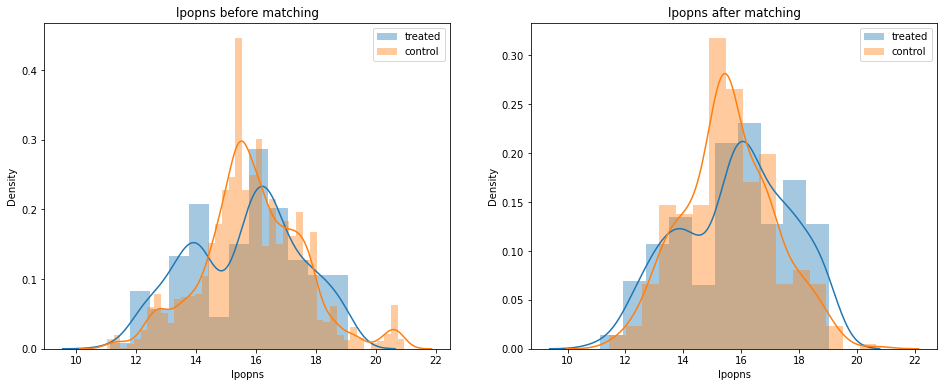

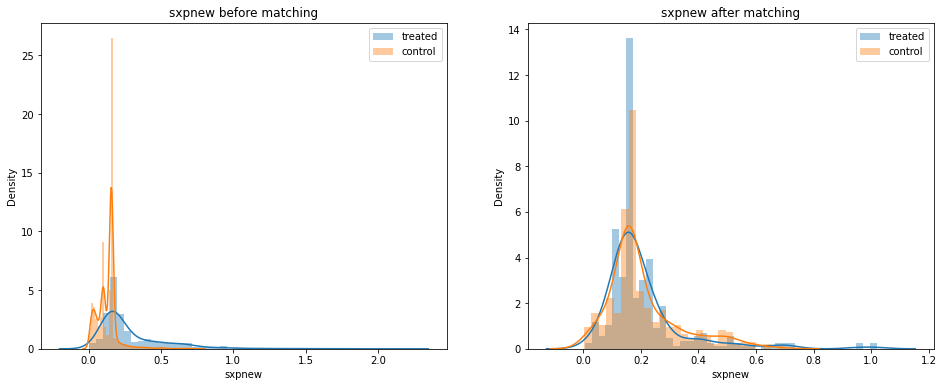

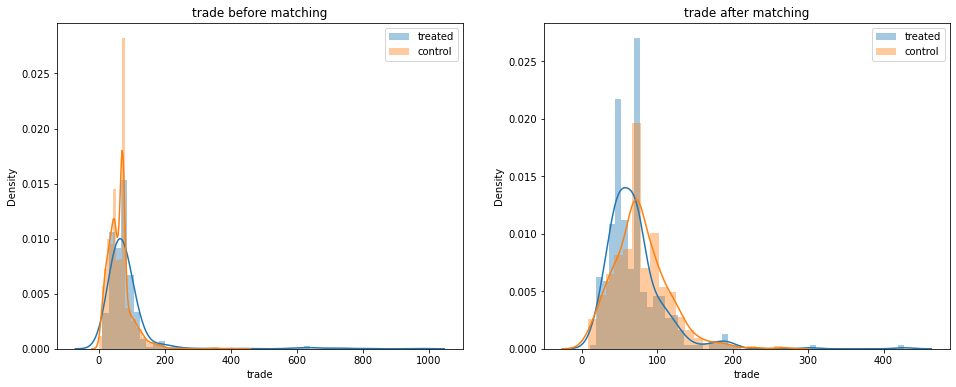

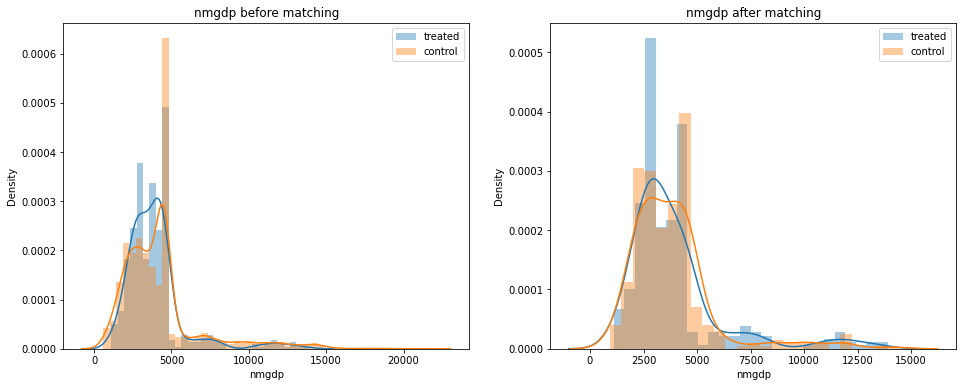

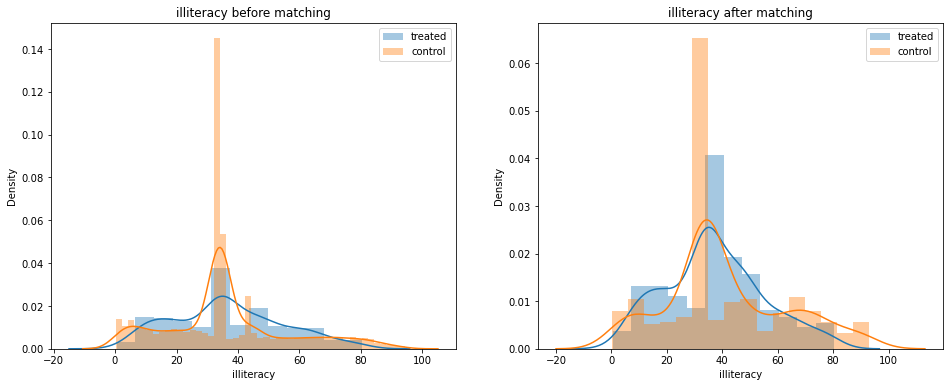

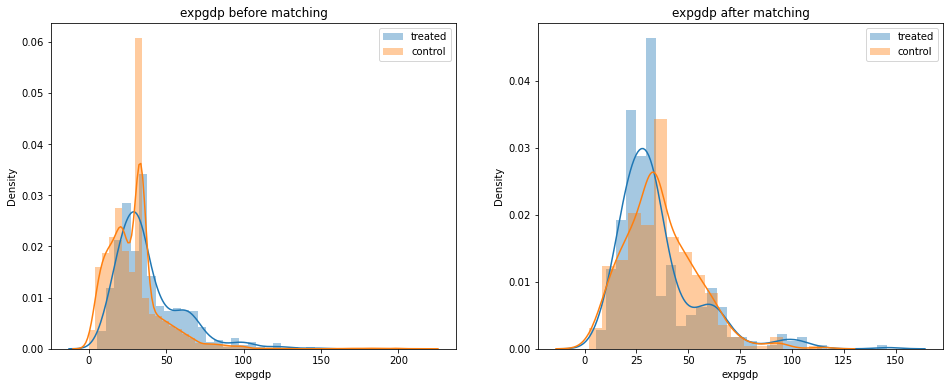

ATE is equal to: 0.178, the 95%-confidence interval is (0.123,0.23)


In [90]:
# oil33, no gini, war
matching_analysis(df_no_gini_clean, 'oil33', feature_imp_no_gini, feature_names_no_gini, "nogini.pickle")

In [91]:
# oil33, no gini, intense war
matching_analysis(df_no_gini_clean, 'oil33', feature_imp_no_gini, feature_names_no_gini, "nogini.pickle", plothists=False, intense_war=True)

Top variables according to mass threshold:  ['lpopns', 'sxpnew', 'trade', 'nmgdp', 'illiteracy', 'expgdp']
Using formula: oil33 ~ lpopns + sxpnew + trade + nmgdp + illiteracy + expgdp
Optimization terminated successfully.
         Current function value: 0.236007
         Iterations 7
Loading match:  nogini.pickle
Number of matched elements: 365
ATE is equal to: 0.0822, the 95%-confidence interval is (0.0466,0.115)


Top variables according to mass threshold:  ['lpopns', 'sxpnew', 'trade', 'nmgdp', 'illiteracy', 'expgdp']
Using formula: oil ~ lpopns + sxpnew + trade + nmgdp + illiteracy + expgdp
Optimization terminated successfully.
         Current function value: 0.345254
         Iterations 7
Loading match:  nogini_oil.pickle
Number of matched elements: 778
Plotting!


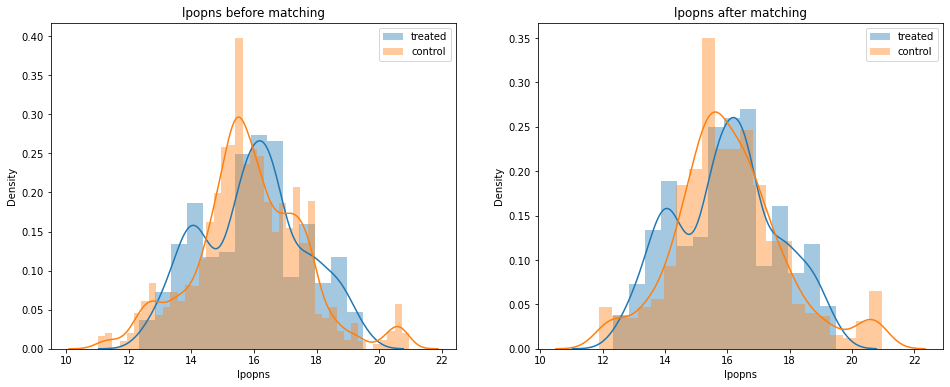

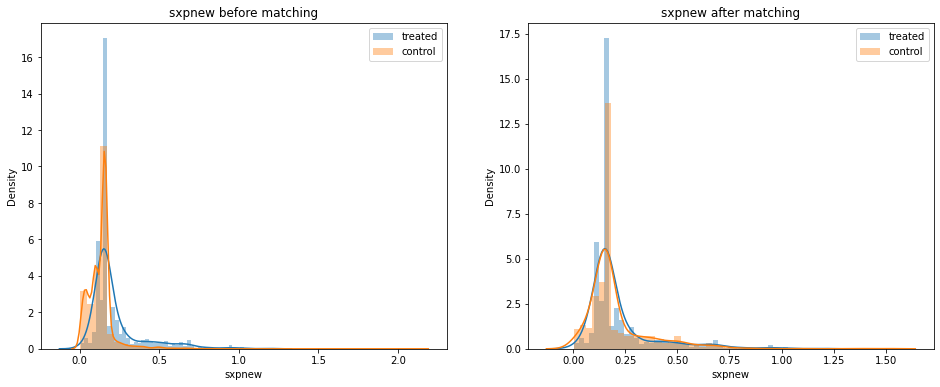

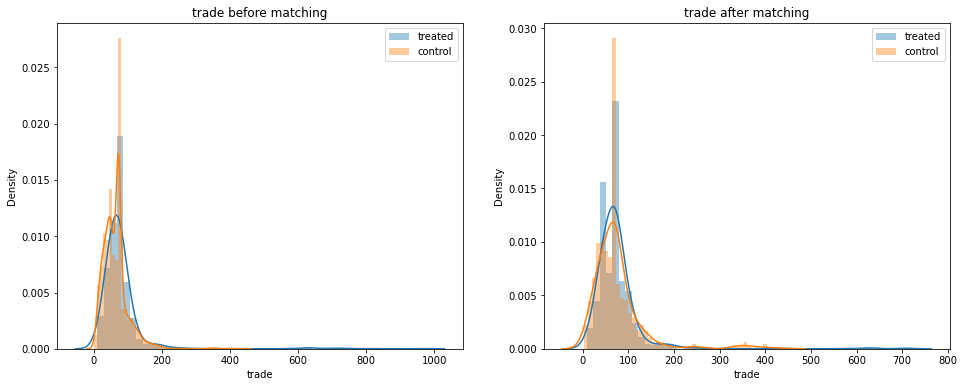

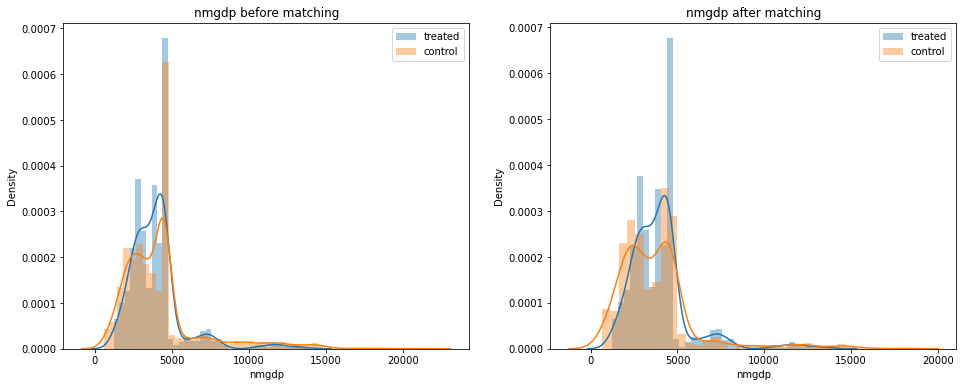

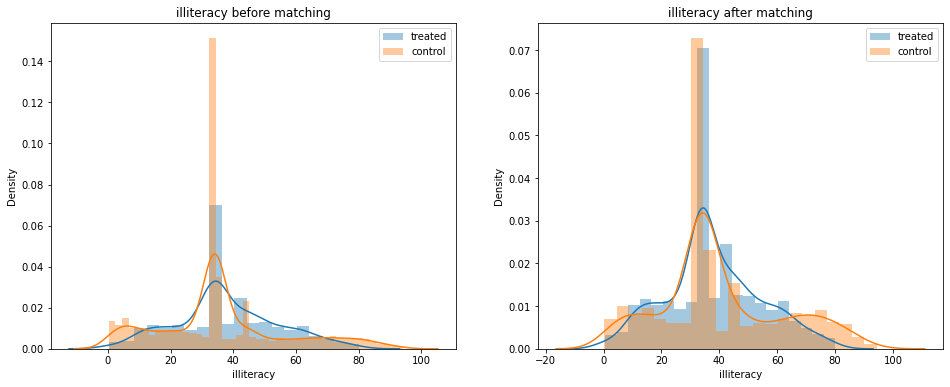

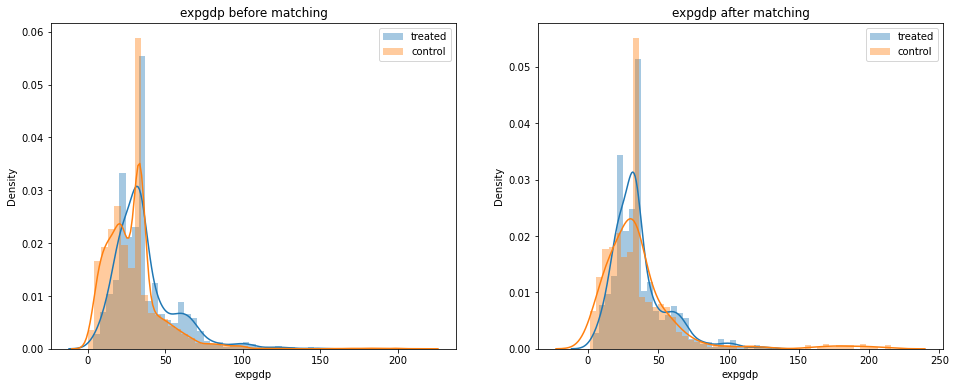

ATE is equal to: 0.0938, the 95%-confidence interval is (0.054,0.136)


In [92]:
# oil, no gini, war
matching_analysis(df_no_gini_clean, 'oil', feature_imp_no_gini, feature_names_no_gini, "nogini_oil.pickle")

In [93]:
# oil, no gini, intense war
matching_analysis(df_no_gini_clean, 'oil', feature_imp_no_gini, feature_names_no_gini, 
                  "nogini_oil.pickle", intense_war=True, plothists=False)

Top variables according to mass threshold:  ['lpopns', 'sxpnew', 'trade', 'nmgdp', 'illiteracy', 'expgdp']
Using formula: oil ~ lpopns + sxpnew + trade + nmgdp + illiteracy + expgdp
Optimization terminated successfully.
         Current function value: 0.345254
         Iterations 7
Loading match:  nogini_oil.pickle
Number of matched elements: 778
ATE is equal to: 0.0733, the 95%-confidence interval is (0.0476,0.099)


Top variables according to mass threshold:  ['illiteracy', 'ehet', 'sxpnew', 'lpopns', 'numlang', 'trade']
Using formula: oil33 ~ illiteracy + ehet + sxpnew + lpopns + numlang + trade
Optimization terminated successfully.
         Current function value: 0.181015
         Iterations 8
Loading match:  gini.pickle
Number of matched elements: 108
Plotting!


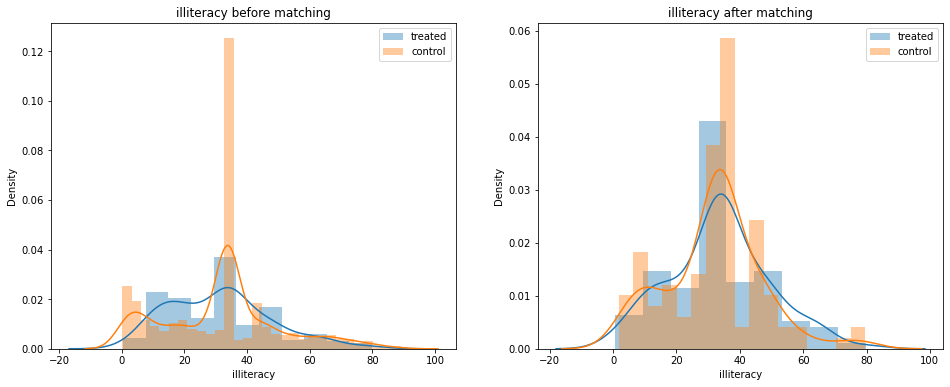

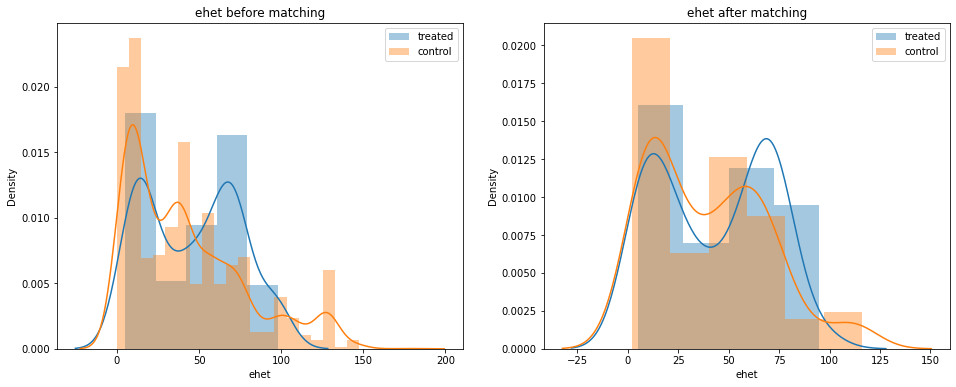

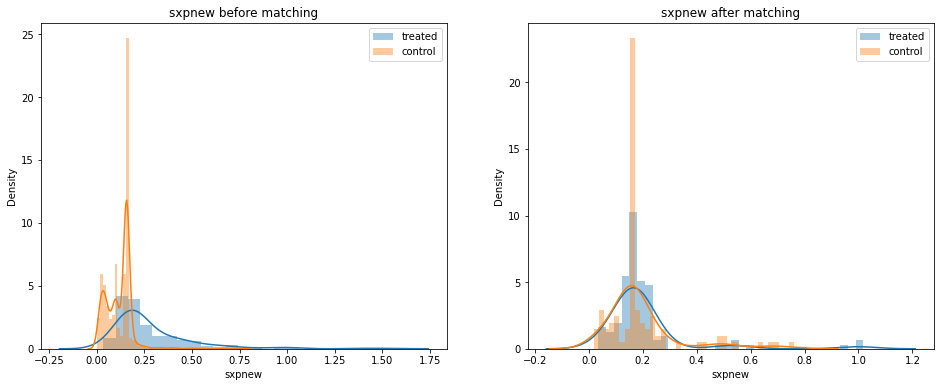

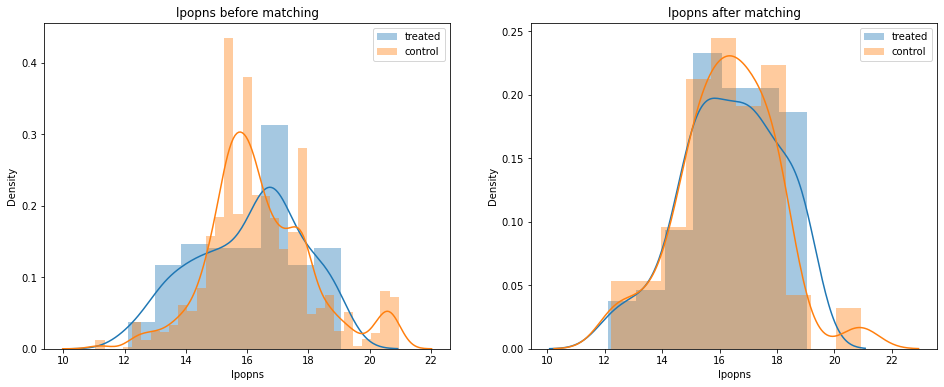

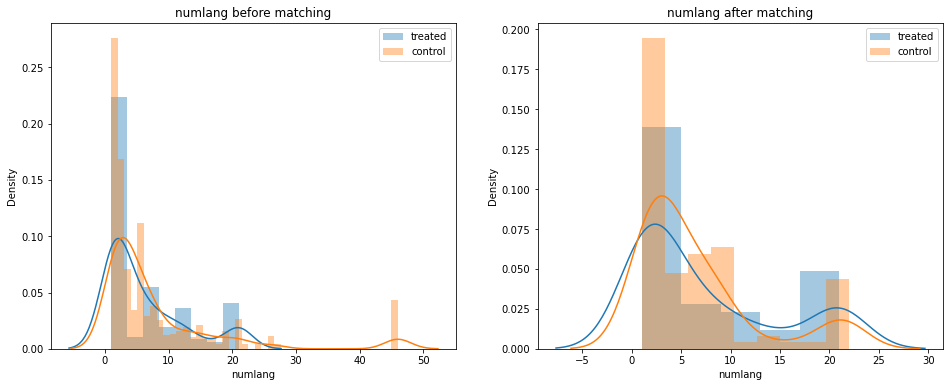

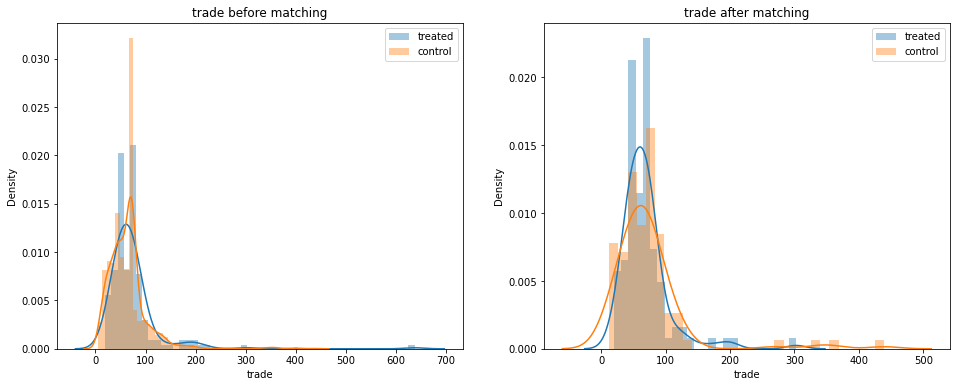

ATE is equal to: 0.157, the 95%-confidence interval is (0.0461,0.278)


In [94]:
# oil33, gini, war
matching_analysis(df_gini_clean, 'oil33', feature_imp_gini, feature_names_gini, 
                  "gini.pickle")

In [95]:
# oil33, gini, intense war
matching_analysis(df_gini_clean, 'oil33', feature_imp_gini, feature_names_gini, 
                  "gini.pickle", plothists=False, intense_war=True)

Top variables according to mass threshold:  ['illiteracy', 'ehet', 'sxpnew', 'lpopns', 'numlang', 'trade']
Using formula: oil33 ~ illiteracy + ehet + sxpnew + lpopns + numlang + trade
Optimization terminated successfully.
         Current function value: 0.181015
         Iterations 8
Loading match:  gini.pickle
Number of matched elements: 108
ATE is equal to: 0.0556, the 95%-confidence interval is (-0.00926,0.12)


Top variables according to mass threshold:  ['illiteracy', 'ehet', 'sxpnew', 'lpopns', 'numlang', 'trade']
Using formula: oil ~ illiteracy + ehet + sxpnew + lpopns + numlang + trade
Optimization terminated successfully.
         Current function value: 0.318383
         Iterations 7
Loading match:  gini_oil.pickle
Number of matched elements: 302
Plotting!


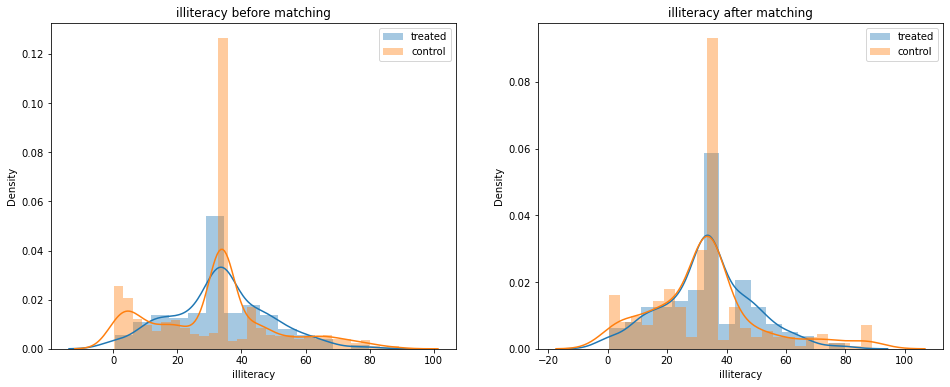

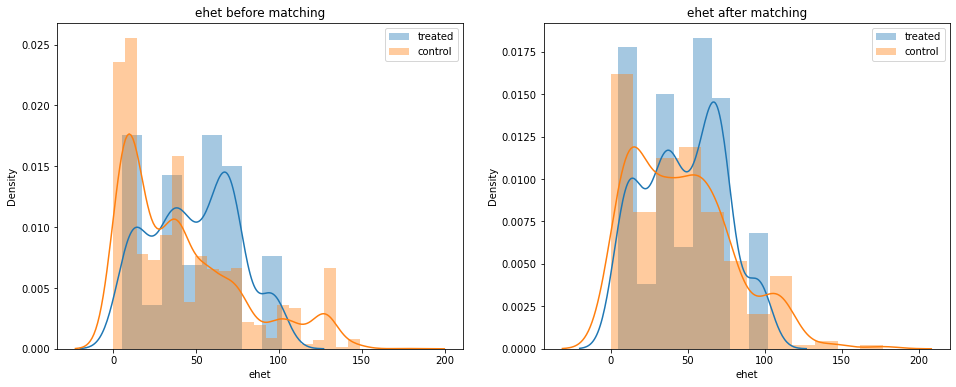

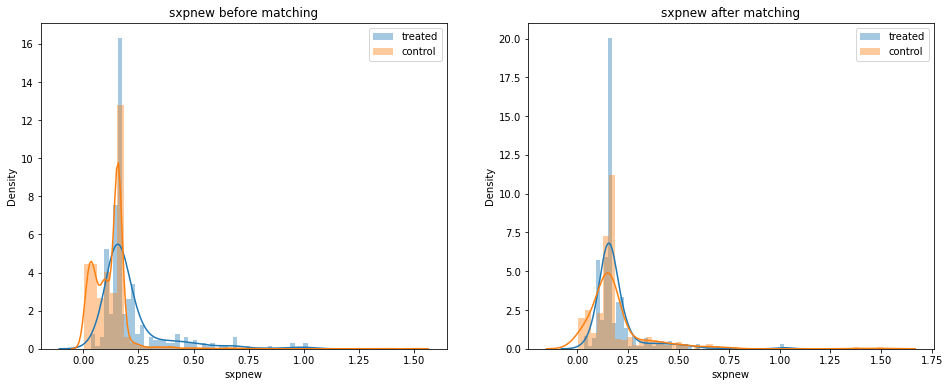

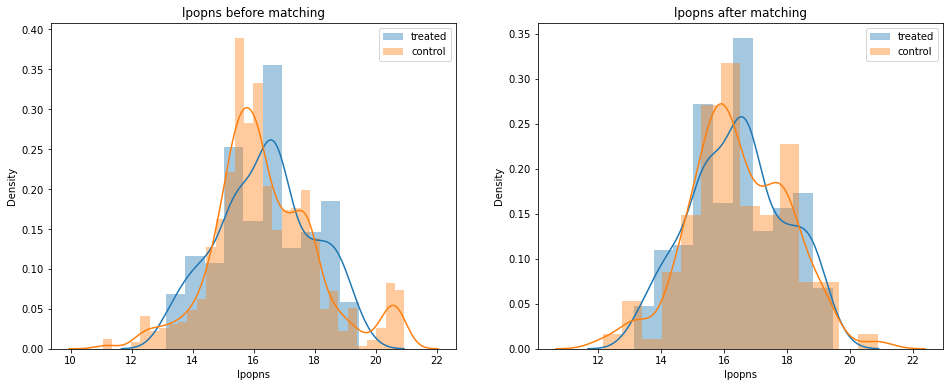

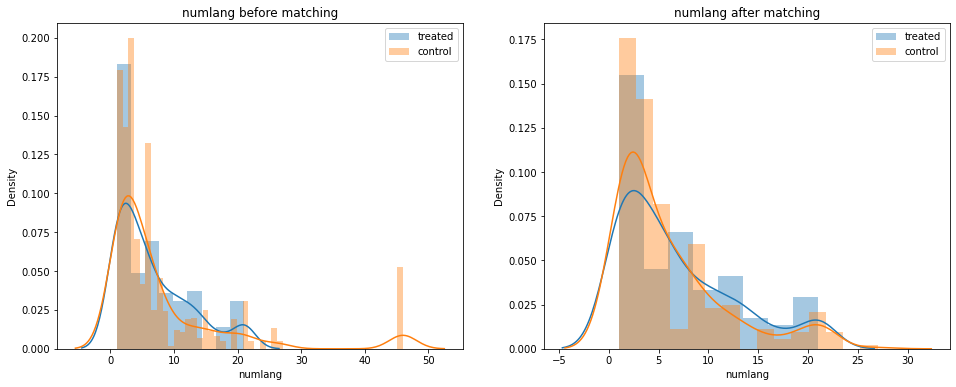

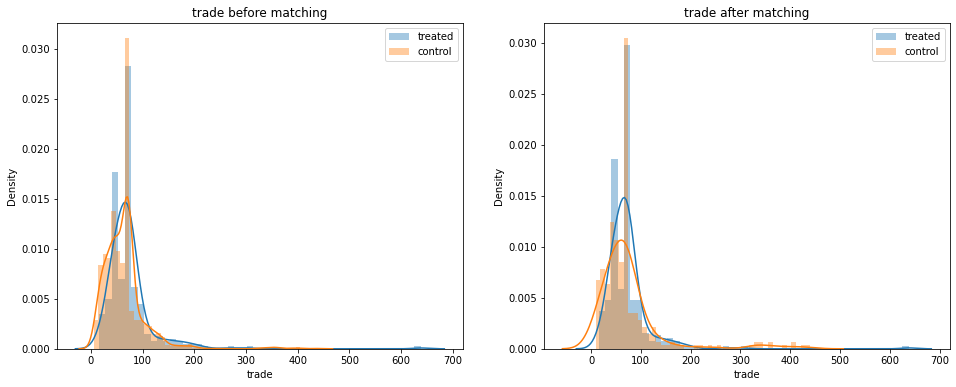

ATE is equal to: 0.185, the 95%-confidence interval is (0.113,0.248)


In [96]:
# oil, gini, war
matching_analysis(df_gini_clean, 'oil', feature_imp_gini, feature_names_gini, 
                  "gini_oil.pickle")

In [97]:
# oil, gini, intense war
matching_analysis(df_gini_clean, 'oil', feature_imp_gini, feature_names_gini, 
                  "gini_oil.pickle", plothists=False, intense_war=True)

Top variables according to mass threshold:  ['illiteracy', 'ehet', 'sxpnew', 'lpopns', 'numlang', 'trade']
Using formula: oil ~ illiteracy + ehet + sxpnew + lpopns + numlang + trade
Optimization terminated successfully.
         Current function value: 0.318383
         Iterations 7
Loading match:  gini_oil.pickle
Number of matched elements: 302
ATE is equal to: 0.0728, the 95%-confidence interval is (0.0297,0.116)


### Print matched countries

In [98]:
def list_matched(match_map, ref_df=joined):
    keys = ref_df.loc[match_map.keys()][["country", "year"]]
    vals = ref_df.loc[match_map.values()][["country", "year"]]
    
    keys_zip = zip(list(keys.country), list(keys.year))
    vals_zip = zip(list(vals.country), list(vals.year))
    return zip(keys_zip, vals_zip)

#### Matched countries

In [99]:
if CFG["verbose_print"]:
    for k, v in list_matched(load_match("nogini_oil.pickle")):
        print(k, v)

('Algeria', 1963) ('Mongolia', 1996)
('Algeria', 1964) ('South Vietnam', 1970)
('Algeria', 1965) ('South Vietnam', 1966)
('Algeria', 1966) ('Bulgaria', 1998)
('Algeria', 1967) ('Ghana', 1986)
('Algeria', 1968) ('Pakistan', 2000)
('Algeria', 1969) ('Malta', 1998)
('Algeria', 1970) ('Malawi', 1992)
('Algeria', 1971) ('Indonesia', 1998)
('Algeria', 1972) ('Tanzania', 1995)
('Algeria', 1973) ('Belize', 1981)
('Algeria', 1974) ('Bolivia', 1980)
('Algeria', 1975) ('Papua New Guinea', 1994)
('Algeria', 1976) ('Togo', 1975)
('Algeria', 1977) ('China', 1999)
('Algeria', 1978) ('Mauritania', 1972)
('Algeria', 1979) ('Ivory Coast', 1969)
('Algeria', 1980) ('Mongolia', 1997)
('Algeria', 1981) ('Singapore', 1994)
('Algeria', 1982) ('Guyana', 1971)
('Algeria', 1983) ('Ivory Coast', 1973)
('Algeria', 1984) ('China', 1965)
('Algeria', 1985) ('Japan', 1999)
('Algeria', 1986) ('Mozambique', 1993)
('Algeria', 1987) ('Honduras', 1984)
('Algeria', 1988) ('Honduras', 1992)
('Algeria', 1989) ('Gambia', 1991)

('Saudi Arabia', 1981) ('Singapore', 1970)
('Saudi Arabia', 1982) ('Singapore', 1975)
('Saudi Arabia', 1984) ('Brazil', 1998)
('Saudi Arabia', 1985) ('Togo', 1978)
('Saudi Arabia', 1986) ('India', 1998)
('Saudi Arabia', 1987) ('Egypt', 1965)
('Saudi Arabia', 1988) ('Taiwan', 1973)
('Saudi Arabia', 1989) ('U.S.A.', 1998)
('Saudi Arabia', 1990) ('India', 1998)
('Saudi Arabia', 1991) ('Liberia', 1983)
('Saudi Arabia', 1992) ('Zambia', 1972)
('Saudi Arabia', 1993) ('Liberia', 1968)
('Saudi Arabia', 1994) ('India', 1999)
('Saudi Arabia', 1995) ('India', 1999)
('Saudi Arabia', 1996) ('Ivory Coast', 1978)
('Saudi Arabia', 1997) ('Germany', 1974)
('Saudi Arabia', 1998) ('Germany', 1966)
('Saudi Arabia', 1999) ('South Africa', 1975)
('Saudi Arabia', 2000) ('Mauritius', 1986)
('Senegal', 1982) ('Thailand', 1998)
('Syria', 1961) ('Zimbabwe', 1987)
('Syria', 1962) ('Peru', 1989)
('Syria', 1963) ('Philippines', 1970)
('Syria', 1973) ('Mauritania', 1974)
('Syria', 1974) ('Zambia', 1982)
('Syria', 19

In [100]:
if CFG["verbose_print"]:
    for k, v in list_matched(load_match("gini_oil.pickle")):
        print(k, v)

('Algeria', 1988) ('Argentina', 1963)
('Algeria', 1989) ('Brazil', 1982)
('Algeria', 1990) ('Canada', 1998)
('Algeria', 1991) ('Madagascar', 1998)
('Algeria', 1992) ('Ivory Coast', 1978)
('Algeria', 1993) ('U.S.A.', 1961)
('Algeria', 1994) ('Mexico', 1963)
('Algeria', 1995) ('Ethiopia', 1995)
('Algeria', 1996) ('Malawi', 1996)
('Algeria', 1997) ('Morocco', 1975)
('Algeria', 1998) ('Greece', 1962)
('Algeria', 1999) ('Sweden', 1998)
('Angola', 1990) ('Dominican Republic', 1984)
('Angola', 1991) ('Bahamas', 1977)
('Angola', 1991) ('Bahamas', 1975)
('Angola', 1993) ('China', 1994)
('Angola', 1994) ('Spain', 1989)
('Angola', 1994) ('France', 1971)
('Angola', 1995) ('Argentina', 1976)
('Angola', 1995) ('China', 1990)
('Angola', 1996) ('Sierra Leone', 1999)
('Angola', 1997) ('Sweden', 1981)
('Angola', 1998) ('Sweden', 1976)
('Angola', 1998) ('Sweden', 1983)
('Angola', 1999) ('Belize', 1993)
('Angola', 2000) ('Ghana', 2000)
('Azerbaijan', 1992) ('Lithuania', 1999)
('Azerbaijan', 1994) ('Georgi

('Russia', 1999) ('Estonia', 1991)
('Russia', 2000) ('Armenia', 1994)
('Venezuela', 1962) ('Taiwan', 1964)
('Venezuela', 1971) ('Germany', 1991)
('Venezuela', 1976) ('Brazil', 1998)
('Venezuela', 1977) ('Japan', 1965)
('Venezuela', 1978) ('Germany', 1984)
('Venezuela', 1979) ('Yugoslavia', 1984)
('Venezuela', 1980) ('Niger', 1998)
('Venezuela', 1981) ('Qatar', 1991)
('Venezuela', 1982) ('Ukraine', 1991)
('Venezuela', 1983) ('Brazil', 1986)
('Venezuela', 1984) ('Brazil', 1983)
('Venezuela', 1986) ('Netherlands', 1984)
('Venezuela', 1987) ('Indonesia', 1998)
('Venezuela', 1988) ('Sri Lanka', 1982)
('Venezuela', 1989) ('U.S.A.', 1979)
('Venezuela', 1991) ('Malaysia', 1989)
('Venezuela', 1993) ('Peru', 1998)
('Venezuela', 1994) ('Germany', 1975)
('Venezuela', 1995) ('Niger', 1994)
('Venezuela', 1996) ('Germany', 1981)
('Venezuela', 1998) ('Poland', 1964)
('Venezuela', 1999) ('Rwanda', 1998)
('Venezuela', 2000) ('Japan', 1972)
('Yemen', 1993) ('Taiwan', 1994)
('Yemen', 1994) ('Argentina', 1

# World Maps

Here we generate the world maps

In [101]:
# uncomment to install geopandas

#!pip3 show geopandas
#!if [ "$?" -ne "0" ]; then pip3 install geopandas; fi

In [102]:
gpd_rename = {
    "Bosnia and Herz." : 'Bosnia-Herzegovina',
    'Central African Rep.' : 'C.A.R.',
    'Congo' : 'Congo (Braz)',
    'Czechia' : 'Czech Republic',
    'Côte d\'Ivoire' : 'Ivory Coast',
    'Dem. Rep. Congo' : 'DR Congo (Zaire)',
    'Dominican Rep.' : 'Dominican Republic',
    'Myanmar' : 'Myanmar (Burma)',
    'South Korea' : 'Korea, South',
    'United Arab Emirates' : 'U.A.R.',
    'United Kingdom' : 'U.K.',
    'United States of America' : 'U.S.A.'    
}

KeyError: nan

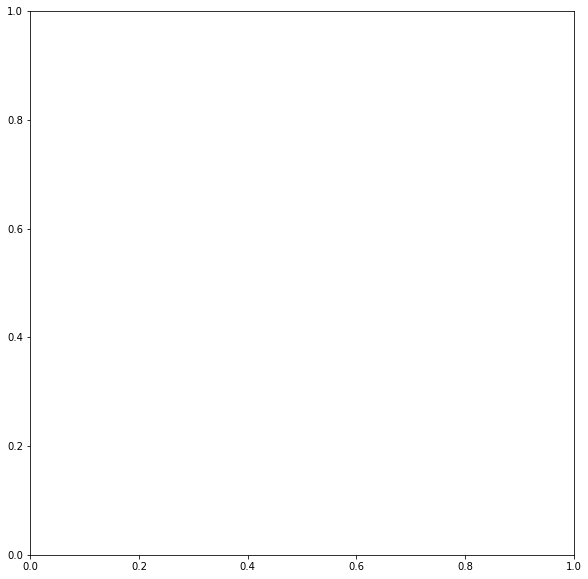

In [103]:
import geopandas
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.drop(world[world.name == "Antarctica"].index, inplace=True)
world.name = [gpd_rename.get(x, x) for x in world.name]

oil = joined[["country", "year", "oil"]].groupby("country").max()
world_merged = world.merge(oil[["oil"]], how="left", left_on="name", right_index=True)
world_merged.plot(column="oil", figsize=(15,10), legend=True, categorical=True, missing_kwds={"color" : "lightgrey"}).set_title("Countries with oil exports > 33% of GDP", fontsize=35)
plt.axis('off')
plt.savefig("img/oil_country_map")
plt.show()

# Map of all countries that ever had oil == 1

In [ ]:
# Used for renaming

In [ ]:
np.setdiff1d(world["name"].unique(), joined.country.unique())

In [ ]:
np.setdiff1d(joined.country.unique(), world["name"].unique())

In [ ]:
# Add USSR, Jugoslavia and Czechoslovakia to war map

ussr = joined[(joined.country == "Russia (Soviet Union)") & (joined.year > 1960)][["country", "year", "war"]].copy()
ussr.loc[:, "country"] = "Russia Kazakhstan Armenia Azerbaijan Belarus Estonia Latvia Lithuania Kyrgyzstan Moldova Tajikistan Turkmenistan Ukraine Uzbekistan"
ussr.country = ussr.country.apply(lambda x : x.split())
ussr = ussr.explode("country")
ussr.reset_index(inplace=True)

yugoslavia = joined[(joined.country == "Yugoslavia") & (joined.year > 1960)][["country", "year", "war"]].copy()
yugoslavia.loc[:, "country"] = "Serbia Croatia Kosovo Montenegro Bosnia-Herzegovina Macedonia Slovenia"
yugoslavia.country = yugoslavia.country.apply(lambda x : x.split())
yugoslavia = yugoslavia.explode("country")
yugoslavia.reset_index(inplace=True)

czechoslovakia = joined[(joined.country == "Czechoslovakia") & (joined.year > 1960)][["country", "year", "war"]].copy()
czechoslovakia.loc[:, "country"] = "Slovakia,Czech Republic"
czechoslovakia.country = czechoslovakia.country.apply(lambda x : x.split(','))
czechoslovakia = czechoslovakia.explode("country")
czechoslovakia.reset_index(inplace=True)

In [ ]:
ussr.head()

In [ ]:
yugoslavia.head()

In [ ]:
czechoslovakia.head()

In [ ]:
# Create dataframe for plotting, with countries, years and wars
war = pd.concat([joined[["country", "year", "war"]], ussr, yugoslavia, czechoslovakia])
war_map = world.merge(war, how="left", left_on="name", right_on="country")
war_map["war_text"] = war_map.war.apply(lambda x : "war" if x else "no war")
war_map_plot = war_map[["name", "war_text", "year", "geometry"]].drop_duplicates().dropna()
war_map_plot.sample(5)

In [ ]:
# Create images for gif
if CFG["generate_gif"]:
    for year in war_map_plot.year.unique().astype(int):
        if year < 1961 or year > 2000:
            continue
        print(f"Year: {year}")

        ax = war_map_plot[war_map_plot.year == year].plot(column="war_text", 
                                           figsize=(25, 15),
                                           legend=True,
                                           categorical=True,)
                                           #missing_kwds = {"color" : "lightgrey"})
        ax.set_title(f"Countries at war in {year}", fontsize=35)
        plt.axis('off')
        plt.text(-150, -50, str(year), fontdict = {"size" : 35})
        plt.savefig(f"img/gif/war_map_{year}")
        plt.close()